#Loading and exploring dataset

In [1]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(2)
def reset_random_seeds(seeds):
   os.environ['PYTHONHASHSEED']=str(2)
   set_seed(seeds)
   np.random.seed(2022)
   random.seed(2022)

import gc

import random
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import itertools
from itertools import chain
import joblib

from zipfile import ZipFile

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.tsa.seasonal import seasonal_decompose

!pip install 'xgboost>=1.6'
from xgboost import XGBRegressor

from sklearn.metrics import r2_score as r2score
from sklearn.metrics import mean_squared_log_error as rmsle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

from tensorflow.random import set_seed
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredLogarithmicError as msle
from tensorflow.keras.models import load_model

!pip install lightgbm
from lightgbm import LGBMRegressor

from tqdm import tqdm
import tqdm.notebook as tq 

!pip install fbprophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_forecast_component, add_changepoints_to_plot

import logging
logging.getLogger('prophet').setLevel(logging.WARNING) 

from joblib import Parallel, delayed
import warnings

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

!pip install --upgrade cmdstanpy
!pip install cmdstanpy.stanfit.mle
!pip install cmdstanpy.stanfit

!pip install 'numpyro>=0.10.1'
import numpyro
import numpyro.distributions as dist
from numpyro.contrib.control_flow import scan
from numpyro.diagnostics import autocorrelation, hpdi
from numpyro.infer import MCMC, NUTS, Predictive

import jax.numpy as jnp
from jax import random

if "NUMPYRO_SPHINXBUILD" in os.environ:
    set_matplotlib_formats("svg")

numpyro.set_host_device_count(4)
numpyro.enable_x64()
#assert numpyro.__version__.startswith("0.10.1") #"0.10.1"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  At

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/GIT_AI/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/GIT_AI


In [3]:
archive = ZipFile('DATA/store-sales-time-series-forecasting.zip', 'r')

In [4]:
archive.namelist()

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [5]:
train = pd.read_csv(archive.open("train.csv"))
train.head(10)

id        date  store_nbr        family  sales  onpromotion
0   0  2013-01-01          1    AUTOMOTIVE    0.0            0
1   1  2013-01-01          1     BABY CARE    0.0            0
2   2  2013-01-01          1        BEAUTY    0.0            0
3   3  2013-01-01          1     BEVERAGES    0.0            0
4   4  2013-01-01          1         BOOKS    0.0            0
5   5  2013-01-01          1  BREAD/BAKERY    0.0            0
6   6  2013-01-01          1   CELEBRATION    0.0            0
7   7  2013-01-01          1      CLEANING    0.0            0
8   8  2013-01-01          1         DAIRY    0.0            0
9   9  2013-01-01          1          DELI    0.0            0

In [6]:
test = pd.read_csv(archive.open("test.csv"))
test.head(10)

id        date  store_nbr        family  onpromotion
0  3000888  2017-08-16          1    AUTOMOTIVE            0
1  3000889  2017-08-16          1     BABY CARE            0
2  3000890  2017-08-16          1        BEAUTY            2
3  3000891  2017-08-16          1     BEVERAGES           20
4  3000892  2017-08-16          1         BOOKS            0
5  3000893  2017-08-16          1  BREAD/BAKERY           12
6  3000894  2017-08-16          1   CELEBRATION            0
7  3000895  2017-08-16          1      CLEANING           25
8  3000896  2017-08-16          1         DAIRY           45
9  3000897  2017-08-16          1          DELI           18

In [7]:
oil = pd.read_csv(archive.open("oil.csv"))
oil.head(10)

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27

In [8]:
holidays = pd.read_csv(archive.open("holidays_events.csv"))
holidays.head(22)

date      type    locale    locale_name  \
0   2012-03-02   Holiday     Local          Manta   
1   2012-04-01   Holiday  Regional       Cotopaxi   
2   2012-04-12   Holiday     Local         Cuenca   
3   2012-04-14   Holiday     Local       Libertad   
4   2012-04-21   Holiday     Local       Riobamba   
5   2012-05-12   Holiday     Local           Puyo   
6   2012-06-23   Holiday     Local       Guaranda   
7   2012-06-25   Holiday  Regional       Imbabura   
8   2012-06-25   Holiday     Local      Latacunga   
9   2012-06-25   Holiday     Local        Machala   
10  2012-07-03   Holiday     Local  Santo Domingo   
11  2012-07-03   Holiday     Local      El Carmen   
12  2012-07-23   Holiday     Local        Cayambe   
13  2012-08-05   Holiday     Local     Esmeraldas   
14  2012-08-10   Holiday  National        Ecuador   
15  2012-08-15   Holiday     Local       Riobamba   
16  2012-08-24   Holiday     Local         Ambato   
17  2012-09-28   Holiday     Local         Ibarra   
18  2012-10-07   Holiday     Local        Quevedo   
19  2012-10-09   Holiday  National        Ecuador   
20  2012-10-12  Transfer  National        Ecuador   
21  2012-11-02   Holiday  National        Ecuador   

                            description  transferred  
0                    Fundacion de Manta        False  
1         Provincializacion de Cotopaxi        False  
2                   Fundacion de Cuenca        False  
3             Cantonizacion de Libertad        False  
4             Cantonizacion de Riobamba        False  
5                Cantonizacion del Puyo        False  
6             Cantonizacion de Guaranda        False  
7         Provincializacion de Imbabura        False  
8            Cantonizacion de Latacunga        False  
9                  Fundacion de Machala        False  
10           Fundacion de Santo Domingo        False  
11           Cantonizacion de El Carmen        False  
12             Cantonizacion de Cayambe        False  
13              Fundacion de Esmeraldas        False  
14        Primer Grito de Independencia        False  
15                Fundacion de Riobamba        False  
16                  Fundacion de Ambato        False  
17                  Fundacion de Ibarra        False  
18             Cantonizacion de Quevedo        False  
19           Independencia de Guayaquil         True  
20  Traslado Independencia de Guayaquil        False  
21                      Dia de Difuntos        False

In [9]:
stores = pd.read_csv(archive.open("stores.csv"))
stores.sample(10)

store_nbr       city      state type  cluster
26         27      Daule     Guayas    D        1
9          10      Quito  Pichincha    C       15
33         34  Guayaquil     Guayas    B        6
23         24  Guayaquil     Guayas    D        1
50         51  Guayaquil     Guayas    A       17
6           7      Quito  Pichincha    D        8
19         20      Quito  Pichincha    B        6
38         39     Cuenca      Azuay    B        6
53         54  El Carmen     Manabi    C        3
7           8      Quito  Pichincha    D        8

In [10]:
transactions = pd.read_csv(archive.open("transactions.csv"))
transactions.head(15)

date  store_nbr  transactions
0   2013-01-01         25           770
1   2013-01-02          1          2111
2   2013-01-02          2          2358
3   2013-01-02          3          3487
4   2013-01-02          4          1922
5   2013-01-02          5          1903
6   2013-01-02          6          2143
7   2013-01-02          7          1874
8   2013-01-02          8          3250
9   2013-01-02          9          2940
10  2013-01-02         10          1293
11  2013-01-02         11          3547
12  2013-01-02         12          1362
13  2013-01-02         13          1102
14  2013-01-02         14          2002

In [11]:
archive.close()

# Data preparation

In [12]:
train.isnull().values.any()

False

## Joining information from other tables

**Replacing NaN value**

In [13]:
oil['dcoilwtico'].iloc[0] = oil['dcoilwtico'].iloc[1]

In [14]:
train = pd.merge(train, oil, on = "date", how = 'left')
test = pd.merge(test, oil, on = "date", how = 'left')

In [15]:
train.iloc[7125:7130]

id        date  store_nbr                      family  sales  \
7125  7125  2013-01-04          9                     PRODUCE    0.0   
7126  7126  2013-01-04          9  SCHOOL AND OFFICE SUPPLIES    0.0   
7127  7127  2013-01-04          9                     SEAFOOD   11.0   
7128  7128  2013-01-05          1                  AUTOMOTIVE    5.0   
7129  7129  2013-01-05          1                   BABY CARE    0.0   

      onpromotion  dcoilwtico  
7125            0       93.12  
7126            0       93.12  
7127            0       93.12  
7128            0         NaN  
7129            0         NaN

In [16]:
train.fillna(method='ffill', inplace=True)

In [17]:
train.iloc[7125:7130]

id        date  store_nbr                      family  sales  \
7125  7125  2013-01-04          9                     PRODUCE    0.0   
7126  7126  2013-01-04          9  SCHOOL AND OFFICE SUPPLIES    0.0   
7127  7127  2013-01-04          9                     SEAFOOD   11.0   
7128  7128  2013-01-05          1                  AUTOMOTIVE    5.0   
7129  7129  2013-01-05          1                   BABY CARE    0.0   

      onpromotion  dcoilwtico  
7125            0       93.12  
7126            0       93.12  
7127            0       93.12  
7128            0       93.12  
7129            0       93.12

In [18]:
test.fillna(method='ffill', inplace=True)

In [19]:
holidays.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [20]:
holidays['locale'] = holidays['locale'].map({'Local': 1, 'Regional': 2, 'National': 3})
holidays = holidays[holidays.transferred == False]
holidays

date        type  locale locale_name  \
0    2012-03-02     Holiday       1       Manta   
1    2012-04-01     Holiday       2    Cotopaxi   
2    2012-04-12     Holiday       1      Cuenca   
3    2012-04-14     Holiday       1    Libertad   
4    2012-04-21     Holiday       1    Riobamba   
..          ...         ...     ...         ...   
345  2017-12-22  Additional       3     Ecuador   
346  2017-12-23  Additional       3     Ecuador   
347  2017-12-24  Additional       3     Ecuador   
348  2017-12-25     Holiday       3     Ecuador   
349  2017-12-26  Additional       3     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[338 rows x 6 columns]

In [21]:
holidays = holidays[['date', 'locale']]
holidays.rename(columns={"locale": "holiday"}, inplace=True)

In [22]:
train = pd.merge(train, holidays, on = "date", how = 'left')
test = pd.merge(test, holidays, on = "date", how = 'left')

In [23]:
train[train['date'] == '2013-11-02'].iloc[:10]

id        date  store_nbr        family     sales  onpromotion  \
550638  543510  2013-11-02          1    AUTOMOTIVE     4.000            0   
550639  543511  2013-11-02          1     BABY CARE     0.000            0   
550640  543512  2013-11-02          1        BEAUTY     2.000            0   
550641  543513  2013-11-02          1     BEVERAGES  1030.000            0   
550642  543514  2013-11-02          1         BOOKS     0.000            0   
550643  543515  2013-11-02          1  BREAD/BAKERY   254.201            0   
550644  543516  2013-11-02          1   CELEBRATION     0.000            0   
550645  543517  2013-11-02          1      CLEANING   497.000            0   
550646  543518  2013-11-02          1         DAIRY   419.000            0   
550647  543519  2013-11-02          1          DELI   103.303            0   

        dcoilwtico  holiday  
550638       94.56      3.0  
550639       94.56      3.0  
550640       94.56      3.0  
550641       94.56      3.0  
550642       94.56      3.0  
550643       94.56      3.0  
550644       94.56      3.0  
550645       94.56      3.0  
550646       94.56      3.0  
550647       94.56      3.0

In [24]:
train[train['date'] == '2013-11-05'].iloc[:10]

id        date  store_nbr        family    sales  onpromotion  \
555984  548856  2013-11-05          1    AUTOMOTIVE    1.000            0   
555985  548857  2013-11-05          1     BABY CARE    0.000            0   
555986  548858  2013-11-05          1        BEAUTY    1.000            0   
555987  548859  2013-11-05          1     BEVERAGES  853.000            0   
555988  548860  2013-11-05          1         BOOKS    0.000            0   
555989  548861  2013-11-05          1  BREAD/BAKERY  294.910            0   
555990  548862  2013-11-05          1   CELEBRATION    0.000            0   
555991  548863  2013-11-05          1      CLEANING  853.000            0   
555992  548864  2013-11-05          1         DAIRY  591.000            0   
555993  548865  2013-11-05          1          DELI  125.776            0   

        dcoilwtico  holiday  
555984        93.4      NaN  
555985        93.4      NaN  
555986        93.4      NaN  
555987        93.4      NaN  
555988        93.4      NaN  
555989        93.4      NaN  
555990        93.4      NaN  
555991        93.4      NaN  
555992        93.4      NaN  
555993        93.4      NaN

In [25]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [26]:
train[train['date'] == '2013-11-05'].iloc[:10]

id        date  store_nbr        family    sales  onpromotion  \
555984  548856  2013-11-05          1    AUTOMOTIVE    1.000            0   
555985  548857  2013-11-05          1     BABY CARE    0.000            0   
555986  548858  2013-11-05          1        BEAUTY    1.000            0   
555987  548859  2013-11-05          1     BEVERAGES  853.000            0   
555988  548860  2013-11-05          1         BOOKS    0.000            0   
555989  548861  2013-11-05          1  BREAD/BAKERY  294.910            0   
555990  548862  2013-11-05          1   CELEBRATION    0.000            0   
555991  548863  2013-11-05          1      CLEANING  853.000            0   
555992  548864  2013-11-05          1         DAIRY  591.000            0   
555993  548865  2013-11-05          1          DELI  125.776            0   

        dcoilwtico  holiday  
555984        93.4      0.0  
555985        93.4      0.0  
555986        93.4      0.0  
555987        93.4      0.0  
555988        93.4      0.0  
555989        93.4      0.0  
555990        93.4      0.0  
555991        93.4      0.0  
555992        93.4      0.0  
555993        93.4      0.0

In [27]:
train = pd.merge(train, transactions, on = ['date', 'store_nbr'], how = 'left')
test = pd.merge(test, transactions, on = ['date', 'store_nbr'], how = 'left')

In [28]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [29]:
train.set_index('id', inplace=True)
test.set_index('id', inplace=True)

In [30]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [31]:
train.isnull().values.any()

False

In [32]:
test.isnull().values.any()

False

## EDA

In [ ]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
family_mean = train[['family', 'sales']].groupby('family').mean().sort_values(by='sales', ascending=False).reset_index()

In [ ]:
px.bar(family_mean, x="family", y="sales")

In [ ]:
family_mean['sales'] = family_mean['sales']*100/sum(family_mean['sales'])

In [ ]:
family_mapper = family_mean.set_index('family').T.to_dict(orient='index')['sales']

In [ ]:
train['family'] = train['family'].map(family_mapper)
test['family'] = test['family'].map(family_mapper)

In [ ]:
train.sample(10)

date  store_nbr     family     sales  onpromotion  dcoilwtico  \
id                                                                            
2654983 2017-02-02         53   0.000942     0.000            0       53.55   
435055  2013-09-02         16   0.141943     0.000            0      107.98   
2863013 2017-05-30          4   0.187095    28.487            0       49.63   
360703  2013-07-22          3   0.182839    47.000            0      106.61   
656919  2014-01-05         40   0.060606     0.000            0       93.66   
2159953 2016-04-30         14   0.000596     0.000            0       45.98   
349006  2013-07-15         50   0.025030     0.000            0      106.20   
2882025 2017-06-10         24  20.214175  4602.000           21       45.82   
1225705 2014-11-20          5   0.060966     2.000            0       75.63   
2038108 2016-02-21         44   2.963268  1965.539            0       29.59   

         holiday  transactions  
id                              
2654983      0.0        1009.0  
435055       0.0        1096.0  
2863013      0.0        1179.0  
360703       0.0        2903.0  
656919       0.0        1132.0  
2159953      3.0        1738.0  
349006       0.0        2398.0  
2882025      0.0        2164.0  
1225705      0.0        1341.0  
2038108      0.0        4917.0

In [ ]:
store_mean = train[['store_nbr', 'sales']].groupby('store_nbr').mean().sort_values(by='sales', ascending=False).reset_index()
px.bar(store_mean, x="store_nbr", y="sales")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3000887
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        float64       
 3   sales         float64       
 4   onpromotion   int64         
 5   dcoilwtico    float64       
 6   holiday       float64       
 7   transactions  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 209.7 MB


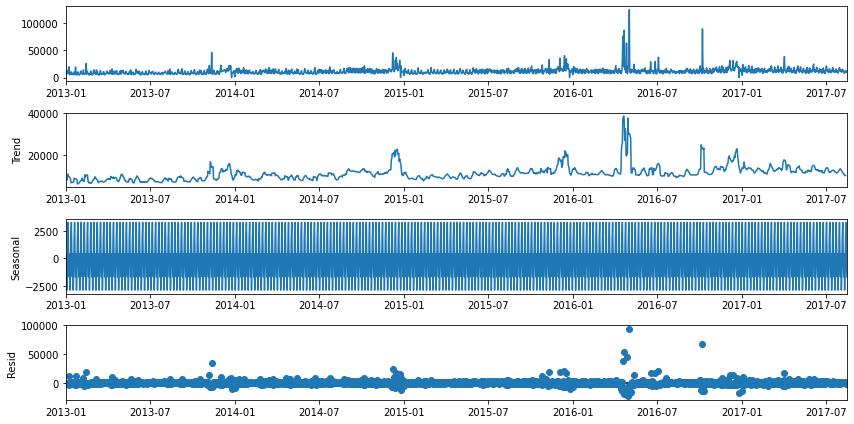

In [ ]:
sd = seasonal_decompose(train[['date', 'sales']].groupby('date').max().asfreq('d').fillna(0), model='add')
fig = sd.plot()
fig.set_size_inches((12, 6))
# Tight layout to realign things
fig.tight_layout()

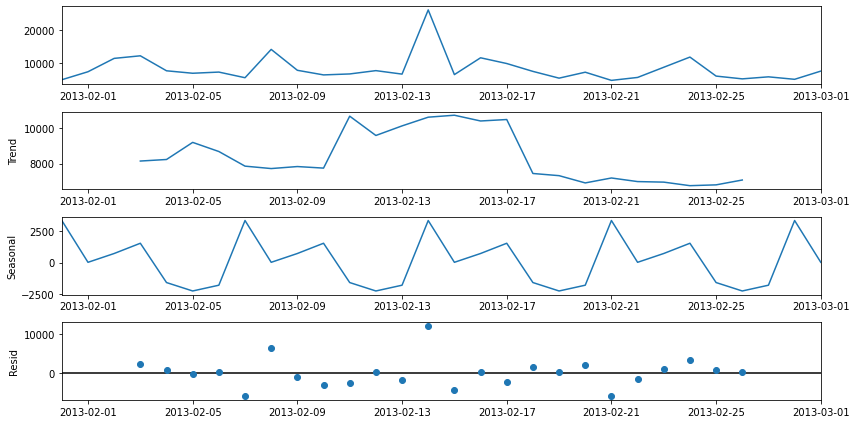

In [ ]:
sd = seasonal_decompose(train[['date', 'sales']].groupby('date').max().asfreq('d').fillna(0).iloc[30:60], model='add')
fig = sd.plot()
fig.set_size_inches((12, 6))
# Tight layout to realign things
fig.tight_layout()

**`sales` seasonality is 7 days**

# XGBoost

In [ ]:
train_multi_idx = train.set_index([train.index, 'date'])

In [ ]:
X = train_multi_idx.drop(columns=['sales'])
y = train_multi_idx['sales']

Number of store as percent of mean sales.

In [ ]:
store_mean['sales'] = store_mean['sales']*100/sum(store_mean['sales'])

In [ ]:
store_mapper = store_mean.set_index('store_nbr').T.to_dict(orient='index')['sales']

In [ ]:
X['store_nbr'] = X['store_nbr'].map(store_mapper)

80:20 train-test split

In [ ]:
X_train, X_test = X[:-int(len(y)*0.2)], X[-int(len(y)*0.2):]
y_train, y_test = y[:-int(len(y)*0.2)], y[-int(len(y)*0.2):]

In [ ]:
simple_xgb = XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", eval_metric='rmsle')
simple_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=1)

[0]	validation_0-rmsle:1.41536
[1]	validation_0-rmsle:1.14460
[2]	validation_0-rmsle:1.07493
[3]	validation_0-rmsle:1.02706
[4]	validation_0-rmsle:1.04141
[5]	validation_0-rmsle:1.04439
[6]	validation_0-rmsle:nan
[7]	validation_0-rmsle:nan
[8]	validation_0-rmsle:nan
[9]	validation_0-rmsle:nan
[10]	validation_0-rmsle:nan
[11]	validation_0-rmsle:nan
[12]	validation_0-rmsle:nan
[13]	validation_0-rmsle:nan
[14]	validation_0-rmsle:nan
[15]	validation_0-rmsle:nan
[16]	validation_0-rmsle:nan
[17]	validation_0-rmsle:nan
[18]	validation_0-rmsle:nan
[19]	validation_0-rmsle:nan
[20]	validation_0-rmsle:nan
[21]	validation_0-rmsle:nan
[22]	validation_0-rmsle:nan
[23]	validation_0-rmsle:nan
[24]	validation_0-rmsle:nan
[25]	validation_0-rmsle:nan
[26]	validation_0-rmsle:nan
[27]	validation_0-rmsle:nan
[28]	validation_0-rmsle:nan
[29]	validation_0-rmsle:nan
[30]	validation_0-rmsle:nan
[31]	validation_0-rmsle:nan
[32]	validation_0-rmsle:nan
[33]	validation_0-rmsle:nan
[34]	validation_0-rmsle:nan
[35]	v

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
pred = simple_xgb.predict(X_test)
r2score(pred, y_test)

0.8963287746125947

Date as parameter, not index

In [ ]:
train_date_param = train.drop(columns=['date'])
dates = pd.DatetimeIndex(train['date'])

train_date_param['year'] = dates.year
train_date_param['months'] = dates.month
train_date_param['days'] = dates.day
train_date_param.sample(10)

store_nbr     family      sales  onpromotion  dcoilwtico  holiday  \
id                                                                           
1782259         16   2.963268   76.87400            0       45.06      0.0   
1789034          7   3.917647  747.39197            2       45.54      0.0   
2227328         53   0.033341    5.00000            0       49.71      0.0   
367387          17   0.025030    0.00000            0      104.76      0.0   
2704480         41   0.025030    0.00000            0       52.63      1.0   
2399278         29   0.182839    8.00000            2       45.88      0.0   
672603          30  11.439983  772.22650            0       92.15      0.0   
2076807         30   1.496434  109.00000            0       37.20      0.0   
2832181         25   0.723815  327.00000            5       47.83      3.0   
2435236         38   0.000942    0.00000            0       47.72      0.0   

         transactions  year  months  days  
id                                         
1782259         748.0  2015       9    30  
1789034        1840.0  2015      10     3  
2227328        1408.0  2016       6     6  
367387         1099.0  2013       7    26  
2704480        1039.0  2017       3     2  
2399278        1364.0  2016       9    11  
672603          750.0  2014       1    14  
2076807         718.0  2016       3    14  
2832181        1059.0  2017       5    13  
2435236        2111.0  2016      10     1

In [ ]:
X = train_date_param.drop(columns=['sales'])
y = train_date_param['sales']
X['store_nbr'] = X['store_nbr'].map(store_mapper)
X_train, X_test = X[:-int(len(y)*0.2)], X[-int(len(y)*0.2):]
y_train, y_test = y[:-int(len(y)*0.2)], y[-int(len(y)*0.2):]

In [ ]:
date_xgb = XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", eval_metric='rmsle')

date_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

pred = date_xgb.predict(X_test)
r2score(y_test, pred)

0.9259372184363099

In [ ]:
#lr=0.1 -> worse
#n_est=1000 -> 0.001 better
date_xgb2 = XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", eval_metric='rmsle', learning_rate=0.15, n_jobs=-1)

date_xgb2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

pred = date_xgb2.predict(X_test)
r2score(y_test, pred)

0.9243567071815184

In [ ]:
final_xgb = XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", learning_rate=0.3, n_jobs=-1)
final_xgb.fit(X, y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
test_date_param = test.drop(columns='date')
dates = pd.DatetimeIndex(test['date'])

test_date_param['year'] = dates.year
test_date_param['months'] = dates.month
test_date_param['days'] = dates.day
test_date_param.sample(10)

store_nbr    family  onpromotion  dcoilwtico  holiday  transactions  \
id                                                                             
3023532         44  0.071085            0       46.40      0.0           0.0   
3029323          7  0.723815            2       47.26      0.0           0.0   
3005616         41  2.242038           52       48.59      0.0           0.0   
3025020         36  2.242038            8       46.46      0.0           0.0   
3013096         50  0.025030           13       47.65      0.0           0.0   
3027211         47  0.723815            2       45.96      0.0           0.0   
3006618          2  0.060606            1       48.59      0.0           0.0   
3006791         24  0.817703            0       48.59      0.0           0.0   
3024880         32  0.000942            0       46.46      0.0           0.0   
3002404         50  0.025030           14       46.80      0.0           0.0   

         year  months  days  
id                           
3023532  2017       8    28  
3029323  2017       8    31  
3005616  2017       8    18  
3025020  2017       8    29  
3013096  2017       8    22  
3027211  2017       8    30  
3006618  2017       8    19  
3006791  2017       8    19  
3024880  2017       8    29  
3002404  2017       8    16

In [ ]:
xgb_pred = date_xgb.predict(test_date_param)

In [ ]:
xgb_test = test.copy()
xgb_test['sales'] = xgb_pred

In [ ]:
xgb_test.sales.to_csv('final_xgb.csv')

In [ ]:
# import joblib
# joblib.dump(final_xgb,'final_xgb.joblib')

['final_xgb.joblib']

# Simple RNN

In [ ]:
train.store_nbr.nunique()

54

In [ ]:
#SCALER
train_multi_idx = train.set_index([train.index, 'date'])
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(train_multi_idx['sales']))

MinMaxScaler()

In [ ]:
def data_split(data, store_num, scaler):
    
    X = data.groupby("store_nbr").get_group(store_num)['sales'] 

    X = pd.DataFrame(X)

    X_train, X_test = X.iloc[:-int(len(X)*0.2)], X.iloc[-int(len(X)*0.2):]

    scaled_train = scaler.transform(X_train)
    scaled_test = scaler.transform(X_test)
    
    return scaled_train, scaled_test
 

#RNN MODEL
def rnn_model():
    reset_random_seeds(2022)

    # define model
    model = Sequential()

    # Simple RNN layer
    model.add(SimpleRNN(64, input_shape=(length, 1)))

    # Final Prediction
    model.add(Dense(1))

    model.compile(optimizer='adam', loss=msle())
    
    return model        

In [ ]:
length = 7 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
early_stop = EarlyStopping(monitor='val_loss', patience=2)
store_number = train_multi_idx.store_nbr.unique()

for i in store_number:
    scaled_train, scaled_test = data_split(train_multi_idx, store_num=i, scaler=scaler)
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
    test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)
    rnn_model().fit(generator, epochs=10, 
                validation_data=test_generator, 
                callbacks=[early_stop]) 
    rnn_model().save(f'simpleRNN_store_{i}.h5')
print("Training completed")

Training completed


**Checking model performance for store 11**

In [ ]:
model = load_model('simpleRNN_store_11.h5')

In [ ]:
length = 7 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch

In [ ]:
scaled_train, scaled_test = data_split(train_multi_idx, store_num=11, scaler=scaler)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [ ]:
test_pred = scaler.inverse_transform(model.predict(test_generator))

11305/11305 [==============================] - 26s 2ms/step


In [ ]:
X = train_multi_idx.groupby("store_nbr").get_group(11)['sales'] 

X = pd.DataFrame(X)

X_train, X_test = X.iloc[:-int(len(X)*0.2)], X.iloc[-int(len(X)*0.2):]

In [ ]:
predict = X_test.copy()
predict = predict.iloc[length-6:-6]
predict.columns = ['actual']
predict['predicted'] = -test_pred

In [ ]:
alpha = np.max(predict.predicted)/np.max(predict.actual)

In [ ]:
predict['predicted'] = -test_pred/alpha

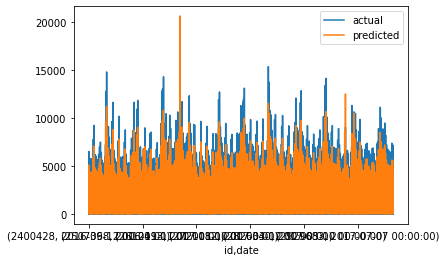

In [ ]:
predict.plot()

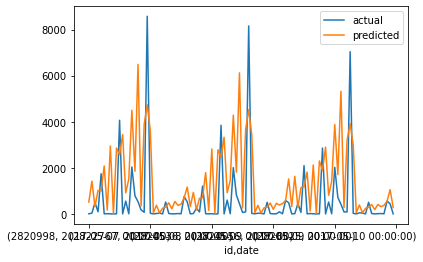

In [ ]:
predict.iloc[-3400:-3300].plot()

In [ ]:
r2score(predict['actual'], predict['predicted'])

-0.48188517661030494

In [ ]:
forecast = []

periods = len(test[test.store_nbr == 11])

data = scaled_test.copy()

for i in range(periods):
  eval_batch = data[-length:]
  current_batch = eval_batch.reshape((1, length, 1))   
  current_pred = model.predict(current_batch, verbose=0)[0]/(-alpha)
  forecast.append(current_pred) 
  data = np.append(data, current_pred[0])

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
test_multi_idx = test.set_index([test.index, 'date'])

In [ ]:
forecast_df = pd.DataFrame(data=forecast, index=test_multi_idx[test_multi_idx.store_nbr == 11].index, columns=['Forecast'])

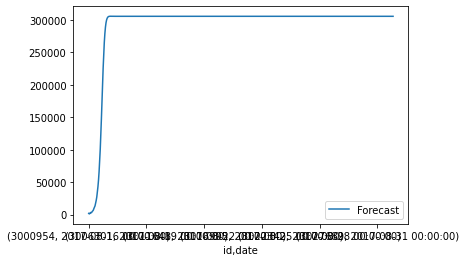

In [ ]:
forecast_df.plot()

**Forecasting for simple RNN model looks poor even after additional scaling**

#RNN with more features



In [ ]:
#SCALER
train_multi_idx = train.set_index([train.index, 'date'])
scaler = StandardScaler()
scaler.fit(pd.DataFrame(train_multi_idx))

StandardScaler()

In [ ]:
# data for 11th store
data = train_multi_idx.groupby("store_nbr").get_group(11) 
# scaling and droping store nbr column
X = np.delete(scaler.transform(data), [0, 2], axis=1)
y = scaler.transform(data)[:, 2]
# split
X_train, X_test = X[:-int(len(data)*0.2)], X[-int(len(data)*0.2):]
y_train, y_test = y[:-int(len(data)*0.2)], y[-int(len(data)*0.2):]

In [ ]:
def rnn_model():
    reset_random_seeds(2022)

    # define model
    model = Sequential()

    # Simple RNN layer
    model.add(SimpleRNN(100, input_shape=(length, 5)))

    # Final Prediction
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    
    return model   

def lstm_model():
    reset_random_seeds(2022)

    # define model
    model = Sequential()

    # Simple RNN layer
    model.add(LSTM(100, input_shape=(length, 5)))

    # Final Prediction
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    
    return model   

In [ ]:
length = 7 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
early_stop = EarlyStopping(monitor='val_loss', patience=2)
store_number = train_multi_idx.store_nbr.unique()

generator = TimeseriesGenerator(X_train, y_train, length=length, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=length, batch_size=batch_size)

In [ ]:
rnn_model().fit(generator, epochs=10, validation_data=test_generator, callbacks=[early_stop]) 
rnn_model().save(f'RNN_store_11.h5')

Epoch 1/10
45243/45243 [==============================] - 236s 5ms/step - loss: 0.3450 - val_loss: 0.4264
Epoch 2/10
45243/45243 [==============================] - 241s 5ms/step - loss: 0.2299 - val_loss: 0.3316
Epoch 3/10
45243/45243 [==============================] - 191s 4ms/step - loss: 0.2034 - val_loss: 0.4496
Epoch 4/10
45243/45243 [==============================] - 188s 4ms/step - loss: 0.1994 - val_loss: 0.3162
Epoch 5/10
45243/45243 [==============================] - 188s 4ms/step - loss: 0.2023 - val_loss: 0.4512
Epoch 6/10
45243/45243 [==============================] - 189s 4ms/step - loss: 0.2067 - val_loss: 0.4586


In [ ]:
lstm_model().fit(generator, epochs=10, validation_data=test_generator, callbacks=[early_stop]) 
lstm_model().save(f'LSTM_store_11.h5')

Epoch 1/10
45243/45243 [==============================] - 298s 7ms/step - loss: 0.2936 - val_loss: 0.2770
Epoch 2/10
45243/45243 [==============================] - 293s 6ms/step - loss: 0.1429 - val_loss: 0.2048
Epoch 3/10
45243/45243 [==============================] - 289s 6ms/step - loss: 0.1341 - val_loss: 0.2055
Epoch 4/10
45243/45243 [==============================] - 311s 7ms/step - loss: 0.1253 - val_loss: 0.2362


**Models' evaluation**

In [ ]:
test_multi_idx = test.set_index([test.index, 'date'])
df = test_multi_idx.copy()
df.insert(2, "sales", [0]*len(test))
df = df[df.store_nbr == 11]
data = np.delete(scaler.transform(df), [0, 2], axis=1)
test_gen = TimeseriesGenerator(data, [0]*len(data), length=length, batch_size=batch_size)

In [ ]:
model = load_model('RNN_store_11.h5')

In [ ]:
preds = model.predict(test_generator, verbose=0)

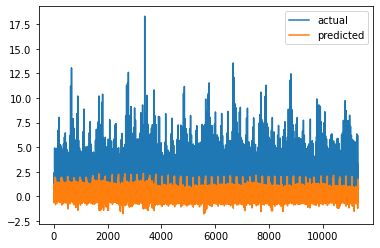

In [ ]:
eval_df = pd.DataFrame({'actual': y_test[7:], 'predicted': preds.T[0]})
eval_df.plot()

In [ ]:
r2score(eval_df['actual'], eval_df['predicted'])

-0.13640762187666944

In [ ]:
pred = model.predict(test_gen, verbose=0)

In [ ]:
forecast = scaler.transform(df)[length:]
forecast[:, 2] = pred.T 
forecast = scaler.inverse_transform(forecast)

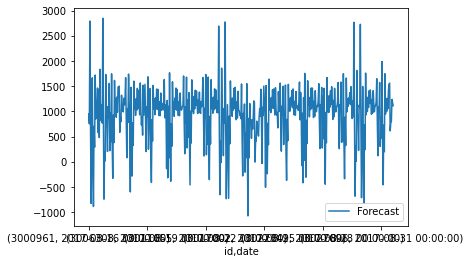

In [ ]:
forecast_df = pd.DataFrame(data=forecast[:, 2], index=df.index[length:], columns=['Forecast'])
forecast_df.plot()

**LSTM evaluation**

In [ ]:
model = load_model('LSTM_store_11.h5')

In [ ]:
preds = model.predict(test_generator, verbose=0)

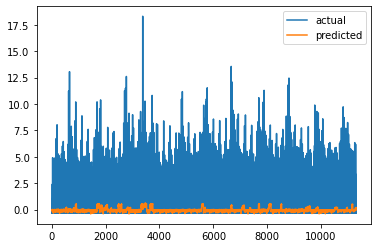

In [ ]:
eval_df = pd.DataFrame({'actual': y_test[7:], 'predicted': preds.T[0]})
eval_df.plot()

In [ ]:
r2score(eval_df['actual'], eval_df['predicted'])

-0.04745356912836307

In [ ]:
pred = model.predict(test_gen, verbose=0)

In [ ]:
forecast = scaler.transform(df)[length:]
forecast[:, 2] = pred.T 
forecast = scaler.inverse_transform(forecast)

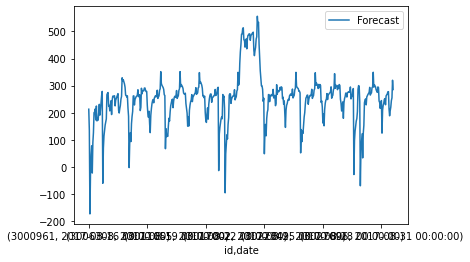

In [ ]:
forecast_df = pd.DataFrame(data=forecast[:, 2], index=df.index[length:], columns=['Forecast'])
forecast_df.plot()

**XGB comparison**

In [ ]:
xgb = pd.read_csv('final_xgb.csv')

In [ ]:
xgb

id        sales
0      3000888     1.045846
1      3000889     1.950505
2      3000890    65.223140
3      3000891  4246.488000
4      3000892     1.950505
...        ...          ...
28507  3029395   247.711730
28508  3029396    10.177865
28509  3029397   955.976560
28510  3029398   352.702030
28511  3029399     3.633079

[28512 rows x 2 columns]

In [ ]:
xgb_11 = xgb.loc[xgb['id'].isin(test[test.store_nbr == 11].index)].reset_index()

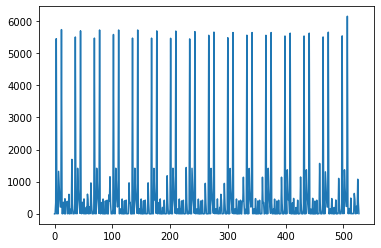

In [ ]:
xgb_11.sales.plot()

#Light GBM

In [ ]:
train_multi_idx = train.set_index([train.index, 'date'])

In [ ]:
X = train_multi_idx.drop(columns=['sales'])
y = train_multi_idx['sales']

Number of store as percent of mean sales.

In [ ]:
store_mean['sales'] = store_mean['sales']*100/sum(store_mean['sales'])

In [ ]:
store_mapper = store_mean.set_index('store_nbr').T.to_dict(orient='index')['sales']

In [ ]:
X['store_nbr'] = X['store_nbr'].map(store_mapper)

80:20 train-test split

In [ ]:
X_train, X_test = X[:-int(len(y)*0.2)], X[-int(len(y)*0.2):]
y_train, y_test = y[:-int(len(y)*0.2)], y[-int(len(y)*0.2):]

In [ ]:
simple_lgb = LGBMRegressor(n_estimators=200, max_depth=5, eval_metric='rmsle')
simple_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=1)

[1]	valid_0's l2: 1.63664e+06
[2]	valid_0's l2: 1.4274e+06
[3]	valid_0's l2: 1.24938e+06
[4]	valid_0's l2: 1.10074e+06
[5]	valid_0's l2: 967364
[6]	valid_0's l2: 860463
[7]	valid_0's l2: 771610
[8]	valid_0's l2: 692686
[9]	valid_0's l2: 629619
[10]	valid_0's l2: 570915
[11]	valid_0's l2: 524270
[12]	valid_0's l2: 481978
[13]	valid_0's l2: 448774
[14]	valid_0's l2: 418425
[15]	valid_0's l2: 394744
[16]	valid_0's l2: 372126
[17]	valid_0's l2: 350968
[18]	valid_0's l2: 334709
[19]	valid_0's l2: 321142
[20]	valid_0's l2: 311276
[21]	valid_0's l2: 299251
[22]	valid_0's l2: 289700
[23]	valid_0's l2: 280844
[24]	valid_0's l2: 270298
[25]	valid_0's l2: 260510
[26]	valid_0's l2: 254116
[27]	valid_0's l2: 246098
[28]	valid_0's l2: 241376
[29]	valid_0's l2: 236813
[30]	valid_0's l2: 231488
[31]	valid_0's l2: 228361
[32]	valid_0's l2: 225108
[33]	valid_0's l2: 220951
[34]	valid_0's l2: 217752
[35]	valid_0's l2: 214726
[36]	valid_0's l2: 212577
[37]	valid_0's l2: 209906
[38]	valid_0's l2: 208225
[3

LGBMRegressor(eval_metric='rmsle', max_depth=5, n_estimators=200)

In [ ]:
pred = simple_lgb.predict(X_test)
r2score(pred, y_test)

0.8807907173940057

In [ ]:
simple_lgb = LGBMRegressor(n_estimators=1000, max_depth=5)
simple_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

LGBMRegressor(max_depth=5, n_estimators=1000)

In [ ]:
pred = simple_lgb.predict(X_test)
r2score(pred, y_test)

0.8936481083629433

Date as parameter, not index

In [ ]:
train_date_param = train.drop(columns=['date'])
dates = pd.DatetimeIndex(train['date'])

train_date_param['year'] = dates.year
train_date_param['months'] = dates.month
train_date_param['days'] = dates.day

In [ ]:
X = train_date_param.drop(columns=['sales'])
y = train_date_param['sales']
X['store_nbr'] = X['store_nbr'].map(store_mapper)
X_train, X_test = X[:-int(len(y)*0.2)], X[-int(len(y)*0.2):]
y_train, y_test = y[:-int(len(y)*0.2)], y[-int(len(y)*0.2):]

In [ ]:
date_lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

date_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

pred = date_lgb.predict(X_test)
r2score(y_test, pred)

0.9292255892908795

In [ ]:
#lr=0.01 -> worse
date_lgb2 = LGBMRegressor(n_estimators=1000, max_depth=5, learning_rate=0.15)

date_lgb2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

pred = date_lgb2.predict(X_test)
r2score(y_test, pred)

0.9265985351100995

In [ ]:
tuned_parameters = {
                 'max_depth': [3, 5, 9],
                 'learning_rate': [0.05, 0.1, 0.2]}

lgb_model =LGBMRegressor(n_estimators=1000)

model_lgb = GridSearchCV(lgb_model, tuned_parameters, cv=5, scoring='r2')
model_lgb.fit(X_train, y_train)

print(model_lgb.best_score_)
print(model_lgb.best_params_)

0.8525595871070836
{'learning_rate': 0.1, 'max_depth': 5}


In [ ]:
final_lgb = LGBMRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1)
final_lgb.fit(X, y, verbose=False)

LGBMRegressor(max_depth=5, n_estimators=1000)

In [ ]:
test_date_param = test.drop(columns='date')
test_date_param['store_nbr'] = test_date_param['store_nbr'].map(store_mapper)
dates = pd.DatetimeIndex(test['date'])
test_date_param['year'] = dates.year
test_date_param['months'] = dates.month
test_date_param['days'] = dates.day
test_date_param.sample(10)

store_nbr    family  onpromotion  dcoilwtico  holiday  transactions  \
id                                                                             
3017447   1.083923  0.033341            0       47.65      0.0           0.0   
3016177   1.755300  1.448255            0       47.24      1.0           0.0   
3021144   1.787636  0.052626            0       47.65      0.0           0.0   
3018604   2.345557  2.963268           40       47.65      0.0           0.0   
3021584   1.760499  3.917647           11       47.65      0.0           0.0   
3022105   1.054347  0.025030            0       47.65      0.0           0.0   
3019072   2.008699  0.000942            0       47.65      0.0           0.0   
3018391   1.450369  0.182839            0       47.65      0.0           0.0   
3020991   1.083923  0.071085            0       47.65      0.0           0.0   
3012133   2.209954  2.288990           10       47.65      0.0           0.0   

         year  months  days  
id                           
3017447  2017       8    25  
3016177  2017       8    24  
3021144  2017       8    27  
3018604  2017       8    25  
3021584  2017       8    27  
3022105  2017       8    27  
3019072  2017       8    26  
3018391  2017       8    25  
3020991  2017       8    27  
3012133  2017       8    22

In [ ]:
lgb_pred = date_lgb.predict(test_date_param)
#lgb_pred[lgb_pred < 0] = 0
lgb_test = test.copy()
lgb_test['sales'] = lgb_pred
lgb_test.sales.to_csv('final_lgb.csv')
# import joblib
# joblib.dump(final_lgb,'final_lgb.joblib')

## Training time series for stores and families separately

Preview of several time series

In [ ]:
train_11_produce = train[(train.store_nbr == 11) & (train.family == 'PRODUCE')]
train_11_produce.tail(10)

date  store_nbr   family     sales  onpromotion  dcoilwtico  \
id                                                                          
2983164 2017-08-06         11  PRODUCE  1539.230            9       49.57   
2984946 2017-08-07         11  PRODUCE  1349.253            8       49.37   
2986728 2017-08-08         11  PRODUCE  2253.195          140       49.07   
2988510 2017-08-09         11  PRODUCE  1082.373            9       49.59   
2990292 2017-08-10         11  PRODUCE  1467.928            8       48.54   
2992074 2017-08-11         11  PRODUCE  1449.669            8       48.81   
2993856 2017-08-12         11  PRODUCE  1280.458            8       48.81   
2995638 2017-08-13         11  PRODUCE  1290.197            8       48.81   
2997420 2017-08-14         11  PRODUCE  1239.467            8       47.59   
2999202 2017-08-15         11  PRODUCE  2309.767          138       47.57   

         holiday  transactions  
id                              
2983164      0.0        2430.0  
2984946      0.0        2322.0  
2986728      0.0        2285.0  
2988510      0.0        2306.0  
2990292      0.0        2176.0  
2992074      3.0        2254.0  
2993856      0.0        2230.0  
2995638      0.0        2101.0  
2997420      0.0        2203.0  
2999202      1.0        2360.0

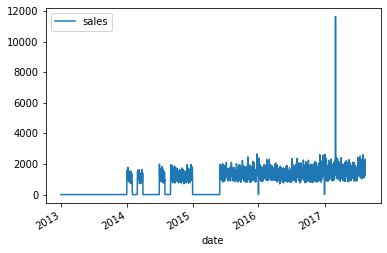

In [ ]:
train_11_produce[['date', 'sales']].set_index('date').plot()

In [ ]:
len(train_11_produce)

1714

In [ ]:
train_11_produce.date.nunique()

1684

In [ ]:
train_52_seafood = train[(train.store_nbr == 52) & (train.family == 'SEAFOOD')]
train_52_seafood.tail(10)

date  store_nbr   family   sales  onpromotion  dcoilwtico  \
id                                                                        
2984651 2017-08-06         52  SEAFOOD   3.959            0       49.57   
2986433 2017-08-07         52  SEAFOOD  13.000            0       49.37   
2988215 2017-08-08         52  SEAFOOD   3.000            0       49.07   
2989997 2017-08-09         52  SEAFOOD   8.000            0       49.59   
2991779 2017-08-10         52  SEAFOOD   9.000            0       48.54   
2993561 2017-08-11         52  SEAFOOD  23.000            3       48.81   
2995343 2017-08-12         52  SEAFOOD   5.000            0       48.81   
2997125 2017-08-13         52  SEAFOOD  12.000            0       48.81   
2998907 2017-08-14         52  SEAFOOD   6.595            0       47.59   
3000689 2017-08-15         52  SEAFOOD   7.000            0       47.57   

         holiday  transactions  
id                              
2984651      0.0        2711.0  
2986433      0.0        2152.0  
2988215      0.0        1997.0  
2989997      0.0        2300.0  
2991779      0.0        2165.0  
2993561      3.0        2957.0  
2995343      0.0        2804.0  
2997125      0.0        2433.0  
2998907      0.0        2074.0  
3000689      1.0        2255.0

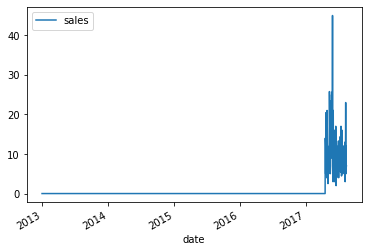

In [ ]:
train_52_seafood[['date', 'sales']].set_index('date').plot()

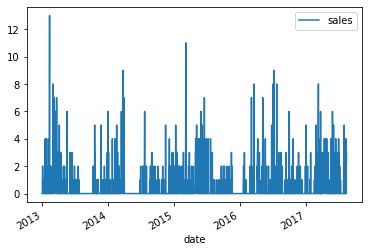

In [ ]:
train_35_seafood = train[(train.store_nbr == 35) & (train.family == 'SEAFOOD')]
train_35_seafood[['date', 'sales']].set_index('date').plot()

Test training for 11th store and family 'PRODUCE' - 7-days-lagged time series

In [ ]:
train_date_param = train_11_produce.drop(columns=['date', 'store_nbr', 'family'])
dates = pd.DatetimeIndex(train_11_produce['date'])
train_date_param['year'] = dates.year
train_date_param['months'] = dates.month
train_date_param['days'] = dates.day

In [ ]:
scaler_X = MinMaxScaler()
scaler_X.fit(train_date_param.drop(columns=['sales']))
scaler_y = MinMaxScaler()
scaler_y.fit(pd.DataFrame(train_date_param['sales']))

MinMaxScaler()

In [ ]:
scaled_X = scaler_X.transform(train_date_param.drop(columns=['sales']))
scaled_y = scaler_y.transform(pd.DataFrame(train_date_param['sales']))

In [ ]:
scaled_X_train, scaled_X_val = scaled_X[:-62], scaled_X[-62:]
scaled_y_train, scaled_y_val = scaled_y[:-62], scaled_y[-62:]

In [ ]:
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=7, batch_size=1)
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val, length=7, batch_size=1)

In [ ]:
X_train = np.array([i[0].reshape(-1) for i in generator])
y_train = np.array([i[1][0] for i in generator]).T[0]
X_val = np.array([i[0].reshape(-1) for i in val_generator])
y_val = np.array([i[1][0] for i in val_generator]).T[0]

In [ ]:
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

pred = lgb.predict(X_val)
r2score(y_val, pred)

0.34139320833789744

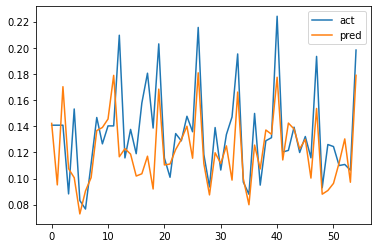

In [ ]:
pred_df = pd.DataFrame({'act': y_val, 'pred': pred})
pred_df.plot()

In [ ]:
rmsle(scaler_y.inverse_transform(y_val.reshape(-1, 1)), scaler_y.inverse_transform(pred.reshape(-1, 1)), squared=False)

0.2015324401314854

Test training for 11th store and family 'PRODUCE' - 14-days-lagged time series

In [ ]:
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=14, batch_size=1)
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val, length=14, batch_size=1)

In [ ]:
X_train = np.array([i[0].reshape(-1) for i in generator])
y_train = np.array([i[1][0] for i in generator]).T[0]
X_val = np.array([i[0].reshape(-1) for i in val_generator])
y_val = np.array([i[1][0] for i in val_generator]).T[0]

In [ ]:
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

pred = lgb.predict(X_val)
r2score(y_val, pred)

0.38138029257133754

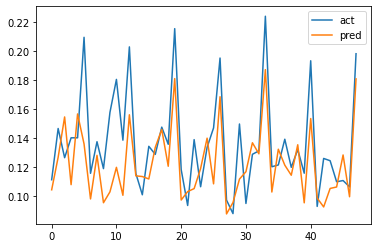

In [ ]:
pred_df = pd.DataFrame({'act': y_val, 'pred': pred})
pred_df.plot()

In [ ]:
rmsle(scaler_y.inverse_transform(y_val.reshape(-1, 1)), scaler_y.inverse_transform(pred.reshape(-1, 1)), squared=False)

0.19211032221187202

Test training for 11th store and family 'PRODUCE' - 30-days-lagged time series


In [ ]:
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=30, batch_size=1)
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val, length=30, batch_size=1)

In [ ]:
X_train = np.array([i[0].reshape(-1) for i in generator])
y_train = np.array([i[1][0] for i in generator]).T[0]
X_val = np.array([i[0].reshape(-1) for i in val_generator])
y_val = np.array([i[1][0] for i in val_generator]).T[0]

In [ ]:
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

pred = lgb.predict(X_val)
r2score(y_val, pred)

0.5383722509931765

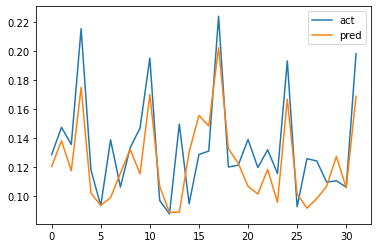

In [ ]:
pred_df = pd.DataFrame({'act': y_val, 'pred': pred})
pred_df.plot()

In [ ]:
rmsle(scaler_y.inverse_transform(y_val.reshape(-1, 1)), scaler_y.inverse_transform(pred.reshape(-1, 1)), squared=False)

0.18670876881392476

Test training for 11th store and family 'PRODUCE' - straightforward model 

In [ ]:
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

lgb.fit(scaled_X_train, scaled_y_train.T[0], eval_set=[(scaled_X_val, scaled_y_val.T[0])], verbose=False)

pred = lgb.predict(scaled_X_val)
r2score(scaled_y_val, pred)

0.6083101888906817

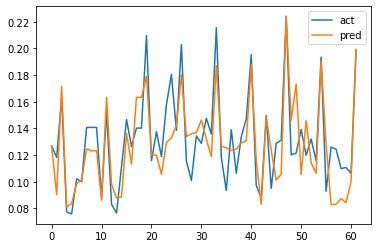

In [ ]:
pred_df = pd.DataFrame({'act': scaled_y_val.T[0], 'pred': pred})
pred_df.plot()

In [ ]:
rmsle(scaler_y.inverse_transform(scaled_y_val.T[0].reshape(-1, 1)), scaler_y.inverse_transform(pred.reshape(-1, 1)), squared=False)

0.17609494820508664

Test training for 11th store and family 'PRODUCE' - straightforward model without scaling

In [ ]:
X = train_date_param.drop(columns=['sales'])
y = pd.DataFrame(train_date_param['sales'])

X_train, X_val = X.iloc[:-62], X.iloc[-62:]
y_train, y_val = y.iloc[:-62], y.iloc[-62:]

In [ ]:
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)

lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

pred = lgb.predict(X_val)
r2score(y_val, pred)

In [ ]:
pred_df = pd.DataFrame({'act': y_val['sales'], 'pred': pred})
pred_df.plot()

In [ ]:
rmsle(y_val['sales'], pred, squared=False)

**Straightforward method without scaling is as good as time series method (regarding RMSLE), but is quicker and requaires less transformations.**

### (54 stores x 33 families) LGBM's trainings

In [ ]:
train_dates = train.drop(columns=['date'])
dates = pd.DatetimeIndex(train['date'])
train_dates['year'] = dates.year
train_dates['months'] = dates.month
train_dates['days'] = dates.day

In [ ]:
stores = train_dates.store_nbr.unique()
families = train_dates.family.unique()

In [ ]:
SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    train_temp = train_dates[(train_dates.store_nbr == store) & (train_dates.family == family)]
    train_temp = train_temp.drop(columns=['store_nbr', 'family'])
    X = train_temp.drop(columns=['sales'])
    y = pd.DataFrame(train_temp['sales'])
    lgb = LGBMRegressor(n_estimators=1000, max_depth=5)
    lgb.fit(X, y, verbose=False)
    F_models[family] = lgb
    preds = lgb.predict(X.iloc[-16:])
    preds[preds < 0] = 0
    errors.append([store, family,
                   rmsle(y.iloc[-16:], preds, squared=False)])

  SF_models[store] = F_models

100%|██████████| 54/54 [22:51<00:00, 25.40s/it]


Forecasting

In [ ]:
test_dates = test.drop(columns=['date'])
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
len(test_dates)/54/33

16.0

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)].values[:, 2:]
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds

100%|██████████| 54/54 [00:15<00:00,  3.57it/s]


In [ ]:
forecast

store_nbr                      family  onpromotion  dcoilwtico  \
id                                                                        
3000888          1                  AUTOMOTIVE            0       46.80   
3000889          1                   BABY CARE            0       46.80   
3000890          1                      BEAUTY            2       46.80   
3000891          1                   BEVERAGES           20       46.80   
3000892          1                       BOOKS            0       46.80   
...            ...                         ...          ...         ...   
3029395          9                     POULTRY            1       47.26   
3029396          9              PREPARED FOODS            0       47.26   
3029397          9                     PRODUCE            1       47.26   
3029398          9  SCHOOL AND OFFICE SUPPLIES            9       47.26   
3029399          9                     SEAFOOD            0       47.26   

         holiday  transactions  year  months  days       sales  
id                                                              
3000888      0.0           0.0  2017       8    16    0.013797  
3000889      0.0           0.0  2017       8    16    0.000000  
3000890      0.0           0.0  2017       8    16    3.322130  
3000891      0.0           0.0  2017       8    16  625.746904  
3000892      0.0           0.0  2017       8    16   -0.010012  
...          ...           ...   ...     ...   ...         ...  
3029395      0.0           0.0  2017       8    31  278.087346  
3029396      0.0           0.0  2017       8    31   78.336177  
3029397      0.0           0.0  2017       8    31  960.762408  
3029398      0.0           0.0  2017       8    31   70.784886  
3029399      0.0           0.0  2017       8    31   10.405599  

[28512 rows x 10 columns]

Previews for 9 worst predicted time series

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.16956434763073294

In [ ]:
np.max(num_errors)

3.085157674224522

In [ ]:
errors[np.argmax(num_errors)]

[39, 'MEATS', 3.085157674224522]

In [ ]:
sorted(num_errors)[-10:]

[0.6805596727335556,
 0.7184579861025779,
 0.7975557215759278,
 0.839901193046553,
 0.8686848065451318,
 0.8802555256442507,
 0.9642964075408105,
 0.9768467856036459,
 1.1439583196901448,
 3.085157674224522]

In [ ]:
errors[np.argsort(num_errors)[-2]][1]

'HOME AND KITCHEN I'

In [ ]:
fig = make_subplots(rows=3, cols=3, subplot_titles=tuple(list('123456789')))
grid = list(itertools.product([1, 2, 3], repeat=2))
for i in range(1, 10):
  store = errors[np.argsort(num_errors)[-i]][0]
  family = errors[np.argsort(num_errors)[-i]][1]
  train_temp = train_dates[(train_dates.store_nbr == store) & (train_dates.family == family)]
   
  figure = px.line(train_temp.reset_index()['sales'])
  for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=grid[i-1][0], col=grid[i-1][1])
        fig.layout.annotations[i-1].update(text=f"{store}, {family}, error = {sorted(num_errors)[-i]:.2f}")  
fig.update_layout(showlegend=False)
fig.show()    

### Dealing with repeated dates

In [ ]:
group_date = train[['date', 'sales']].groupby(["date"]).count()

In [ ]:
group_date.head(10)

sales
date             
2013-01-01   1782
2013-01-02   1782
2013-01-03   1782
2013-01-04   1782
2013-01-05   1782
2013-01-06   1782
2013-01-07   1782
2013-01-08   1782
2013-01-09   1782
2013-01-10   1782

In [ ]:
group_date.loc[group_date.sales > 33*54]

sales
date             
2013-05-12   3564
2013-06-25   5346
2013-07-03   3564
2013-12-22   3564
2014-06-25   7128
2014-07-03   3564
2014-12-22   3564
2014-12-26   3564
2015-06-25   5346
2015-07-03   3564
2015-12-22   3564
2016-04-21   3564
2016-05-01   3564
2016-05-07   3564
2016-05-08   3564
2016-05-12   3564
2016-06-25   5346
2016-07-03   3564
2016-07-24   3564
2016-11-12   3564
2016-12-22   3564
2017-04-14   3564
2017-06-25   5346
2017-07-03   3564

In [ ]:
test_date = train[train.date == '2013-05-12']
test_date

date  store_nbr                      family   sales  onpromotion  \
id                                                                              
233442 2013-05-12          1                  AUTOMOTIVE   1.000            0   
233442 2013-05-12          1                  AUTOMOTIVE   1.000            0   
233443 2013-05-12          1                   BABY CARE   0.000            0   
233443 2013-05-12          1                   BABY CARE   0.000            0   
233444 2013-05-12          1                      BEAUTY   0.000            0   
...           ...        ...                         ...     ...          ...   
235221 2013-05-12          9                     PRODUCE   0.000            0   
235222 2013-05-12          9  SCHOOL AND OFFICE SUPPLIES   0.000            0   
235222 2013-05-12          9  SCHOOL AND OFFICE SUPPLIES   0.000            0   
235223 2013-05-12          9                     SEAFOOD  28.907            0   
235223 2013-05-12          9                     SEAFOOD  28.907            0   

        dcoilwtico  holiday  transactions  
id                                         
233442       95.81      1.0         549.0  
233442       95.81      3.0         549.0  
233443       95.81      1.0         549.0  
233443       95.81      3.0         549.0  
233444       95.81      1.0         549.0  
...            ...      ...           ...  
235221       95.81      3.0        2337.0  
235222       95.81      1.0        2337.0  
235222       95.81      3.0        2337.0  
235223       95.81      1.0        2337.0  
235223       95.81      3.0        2337.0  

[3564 rows x 8 columns]

Dates are repeated due to overlapped holidays. In these cases, maximum values of holidays are kept. 

In [ ]:
test_date.groupby(["date", "store_nbr", "family"]).max().reset_index()  

date  store_nbr                      family    sales  onpromotion  \
0    2013-05-12          1                  AUTOMOTIVE    1.000            0   
1    2013-05-12          1                   BABY CARE    0.000            0   
2    2013-05-12          1                      BEAUTY    0.000            0   
3    2013-05-12          1                   BEVERAGES  384.000            0   
4    2013-05-12          1                       BOOKS    0.000            0   
...         ...        ...                         ...      ...          ...   
1777 2013-05-12         54                     POULTRY   48.711            0   
1778 2013-05-12         54              PREPARED FOODS   70.000            0   
1779 2013-05-12         54                     PRODUCE    0.000            0   
1780 2013-05-12         54  SCHOOL AND OFFICE SUPPLIES    0.000            0   
1781 2013-05-12         54                     SEAFOOD    1.000            0   

      dcoilwtico  holiday  transactions  
0          95.81      3.0         549.0  
1          95.81      3.0         549.0  
2          95.81      3.0         549.0  
3          95.81      3.0         549.0  
4          95.81      3.0         549.0  
...          ...      ...           ...  
1777       95.81      3.0        1350.0  
1778       95.81      3.0        1350.0  
1779       95.81      3.0        1350.0  
1780       95.81      3.0        1350.0  
1781       95.81      3.0        1350.0  

[1782 rows x 8 columns]

In [ ]:
train_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 

### Dealing with outliers

In [ ]:
#https://neptune.ai/blog/anomaly-detection-in-time-series

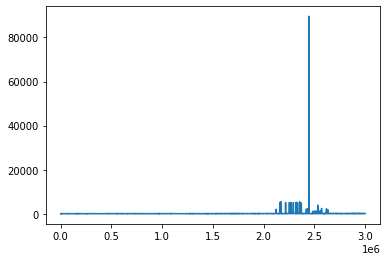

In [ ]:
train_39_meats = train_wo_duplicates[(train_wo_duplicates.store_nbr == 39) & (train_wo_duplicates.family == 'MEATS')]
train_39_meats.sales.plot()

In [ ]:
# sd = seasonal_decompose(train_39_meats[['date', 'sales']].groupby('date').max().asfreq('d').fillna(0), model='add')
# fig = sd.plot()
# fig.set_size_inches((12, 6))
# # Tight layout to realign things
# fig.tight_layout()
# x = sd.resid.index
# y = sd.resid.values
# px.line(x=x, y=y, title = "residuals")

In [ ]:
def fit_predict_model(data):
   m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
               seasonality_mode = 'additive',
               interval_width = 0.99,
               changepoint_range = 0.8)
   m = m.fit(data)
   forecast = m.predict(data)
   forecast['actual'] = data['y'].reset_index(drop = True)
   return m, forecast

def detect_anomalies(forecast):
   forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'actual']].copy()
   forecasted['anomaly'] = 0
   forecasted.loc[forecasted['actual'] > forecasted['yhat_upper'], 'anomaly'] = -1
   forecasted.loc[forecasted['actual'] < forecasted['yhat_lower'], 'anomaly'] = -1
   return forecasted

In [ ]:
data = train_39_meats[['date', 'sales']]
data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
m, outliers = fit_predict_model(data)
outliers = detect_anomalies(outliers)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
outliers[outliers.anomaly != 0]

ds       trend        yhat   yhat_lower   yhat_upper    actual  \
1372 2016-10-07  702.784752  702.784752 -4767.080978  6061.854326  89576.36   

      anomaly  
1372       -1

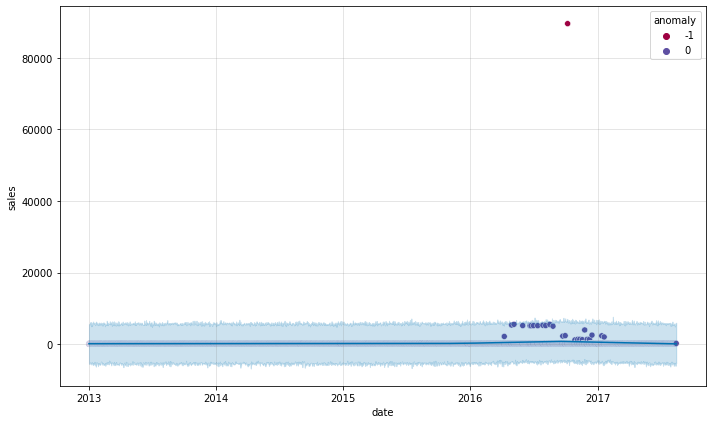

In [ ]:
fig = plt.figure(facecolor='w', figsize=(10, 6))

ax = fig.add_subplot(111)

sns.scatterplot(data=outliers, x='ds', y='actual', hue='anomaly', palette="Spectral", ax=ax)
#ax.plot(model.history['ds'].dt.to_pydatetime(), model.history['y'], 'k.')
ax.plot(outliers.ds, outliers['yhat'], ls='-', c='#0072B2')
ax.fill_between(outliers.ds, outliers['yhat_lower'], outliers['yhat_upper'], color='#0072B2', alpha=0.2)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('sales')
fig.tight_layout()

Replacing outliers with `yhat`

In [ ]:
train_39_meats.loc[(outliers.anomaly != 0).values, 'sales'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



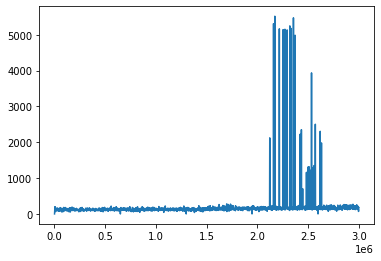

In [ ]:
train_39_meats.sales.plot()

Training after replacing outliers

In [ ]:
train_dates_wo_duplicates = train_wo_duplicates.drop(columns=['date'])
dates = pd.DatetimeIndex( train_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

In [ ]:
train_39_meats = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 39) & (train_dates_wo_duplicates.family == 'MEATS')]

train_temp = train_39_meats.copy()
train_temp = train_temp.drop(columns=['store_nbr', 'family'])
X = train_temp.drop(columns=['sales'])
y = pd.DataFrame(train_temp['sales'])
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)
lgb.fit(X, y, verbose=False)
preds = lgb.predict(X.iloc[-16:])
preds[preds < 0] = 0
error = rmsle(y.iloc[-16:], preds, squared=False)

In [ ]:
np.round(error, 2)

2.59

Error is lower after replacing outliers.

Another sample store

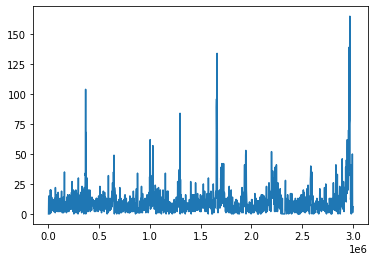

In [ ]:
train_19_grocery = train_wo_duplicates[(train_wo_duplicates.store_nbr == 19) & (train_wo_duplicates.family == 'GROCERY II')]
train_19_grocery.sales.plot()

In [ ]:
data = train_19_grocery[['date', 'sales']]
data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
m, outliers = fit_predict_model(data)
outliers = detect_anomalies(outliers)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



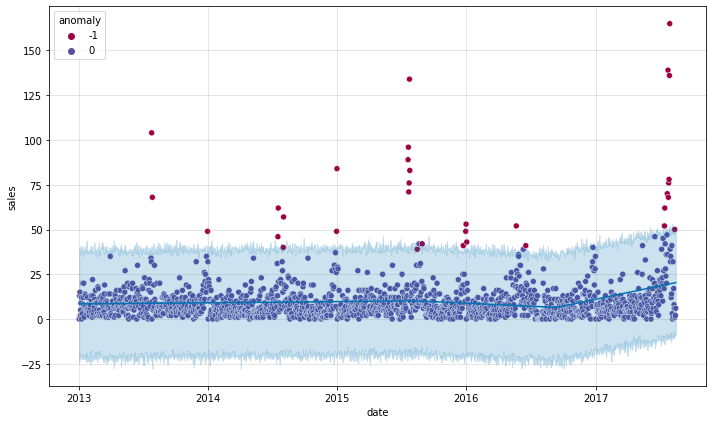

In [ ]:
fig = plt.figure(facecolor='w', figsize=(10, 6))

ax = fig.add_subplot(111)

sns.scatterplot(data=outliers, x='ds', y='actual', hue='anomaly', palette="Spectral", ax=ax)
#ax.plot(model.history['ds'].dt.to_pydatetime(), model.history['y'], 'k.')
ax.plot(outliers.ds, outliers['yhat'], ls='-', c='#0072B2')
ax.fill_between(outliers.ds, outliers['yhat_lower'], outliers['yhat_upper'], color='#0072B2', alpha=0.2)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('sales')
fig.tight_layout()

Replacing outliers with `yhat`

In [ ]:
train_19_grocery.loc[(outliers.anomaly != 0).values, 'sales'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



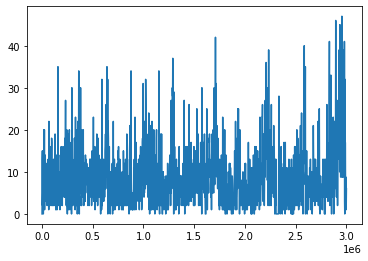

In [ ]:
train_19_grocery.sales.plot()

In [ ]:
train_19_grocery = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 19) & (train_dates_wo_duplicates.family == 'GROCERY II')]

train_temp = train_19_grocery.copy()
train_temp = train_temp.drop(columns=['store_nbr', 'family'])
X = train_temp.drop(columns=['sales'])
y = pd.DataFrame(train_temp['sales'])
lgb = LGBMRegressor(n_estimators=1000, max_depth=5)
lgb.fit(X, y, verbose=False)
preds = lgb.predict(X.iloc[-16:])
preds[preds < 0] = 0
error = rmsle(y.iloc[-16:], preds, squared=False)

In [ ]:
np.round(error, 2)

0.8

Error remained the same after raplacing outliers.

##Training dataset without outliers and duplicates

In [ ]:
train_dates_wo_duplicates = train_wo_duplicates.copy()
dates = pd.DatetimeIndex(train_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    train_temp = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    #replace outliers
    data = train_temp[['date', 'sales']]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      train_temp.loc[(outliers.anomaly != 0).values, 'sales'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

    train_temp.drop(columns=['date'], inplace=True)
    #train LGBM
    train_temp = train_temp.drop(columns=['store_nbr', 'family'])
    X = train_temp.drop(columns=['sales'])
    y = pd.DataFrame(train_temp['sales'])
    lgb = LGBMRegressor(n_estimators=1000, max_depth=5)
    lgb.fit(X, y, verbose=False)
    F_models[family] = lgb
    preds = lgb.predict(X.iloc[-16:])
    preds[preds < 0] = 0
    #RMSLE for predicted last 16 days
    errors.append([store, family,
                   rmsle(y.iloc[-16:], preds, squared=False)])

  SF_models[store] = F_models

100%|██████████| 54/54 [50:44<00:00, 56.39s/it]


Forecasting

In [ ]:
group_date = test[['date', 'family']].groupby(["date"]).count()
group_date.loc[group_date.family > 33*54]

Empty DataFrame
Columns: [family]
Index: []

In [ ]:
test_dates = test.drop(columns=['date'])
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)].values[:, 2:]
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds

100%|██████████| 54/54 [00:15<00:00,  3.43it/s]


In [ ]:
forecast

store_nbr                      family  onpromotion  dcoilwtico  \
id                                                                        
3000888          1                  AUTOMOTIVE            0       46.80   
3000889          1                   BABY CARE            0       46.80   
3000890          1                      BEAUTY            2       46.80   
3000891          1                   BEVERAGES           20       46.80   
3000892          1                       BOOKS            0       46.80   
...            ...                         ...          ...         ...   
3029395          9                     POULTRY            1       47.26   
3029396          9              PREPARED FOODS            0       47.26   
3029397          9                     PRODUCE            1       47.26   
3029398          9  SCHOOL AND OFFICE SUPPLIES            9       47.26   
3029399          9                     SEAFOOD            0       47.26   

         holiday  transactions  year  months  days       sales  
id                                                              
3000888      0.0           0.0  2017       8    16   -0.157665  
3000889      0.0           0.0  2017       8    16    0.000000  
3000890      0.0           0.0  2017       8    16    2.558561  
3000891      0.0           0.0  2017       8    16  711.701948  
3000892      0.0           0.0  2017       8    16   -0.106766  
...          ...           ...   ...     ...   ...         ...  
3029395      0.0           0.0  2017       8    31  292.202265  
3029396      0.0           0.0  2017       8    31   76.281700  
3029397      0.0           0.0  2017       8    31  924.697171  
3029398      0.0           0.0  2017       8    31   25.521817  
3029399      0.0           0.0  2017       8    31    9.271112  

[28512 rows x 10 columns]

In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('lgb_wo_out&dup.csv') #1.02365

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.1546953310422811

In [ ]:
np.max(num_errors)

0.9667442935569949

In [ ]:
errors[np.argmax(num_errors)]

[32, 'LIQUOR,WINE,BEER', 0.9667442935569949]

In [ ]:
sorted(num_errors)[-10:]

[0.6575862810911277,
 0.683424491752442,
 0.7080497141366063,
 0.718780348591699,
 0.7350779834105973,
 0.7661869701095632,
 0.8015134660273406,
 0.8446354802434108,
 0.9561715672539257,
 0.9667442935569949]

In [ ]:
# import joblib
# joblib.dump(SF_models,'LGBmodels.joblib')
# joblib.dump(errors,'LGBerrors.joblib')

['LGBerrors.joblib']

#Facebook Prophet

In [ ]:
#https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events
#https://facebook.github.io/prophet/docs/non-daily_data.html#sub-daily-data
#https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning 

In [ ]:
train_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 

In [ ]:
train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 11) & (train_wo_duplicates.family == 'PRODUCE')]
X = train_temp[['sales', 'date']].reset_index()
X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True) #prophet requirement
X_train, X_val = X.iloc[:-62], X.iloc[-62:]

In [ ]:
m = Prophet()#weekly_seasonality = True)
m.fit(X_train)  

In [ ]:
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
1679 2017-08-11  1192.791661   647.086147  1788.098778
1680 2017-08-12  1323.310293   752.967778  1845.555420
1681 2017-08-13  1455.777177   871.805862  1997.587902
1682 2017-08-14  1235.223139   697.453728  1807.837683
1683 2017-08-15  1677.682895  1143.073269  2275.142226

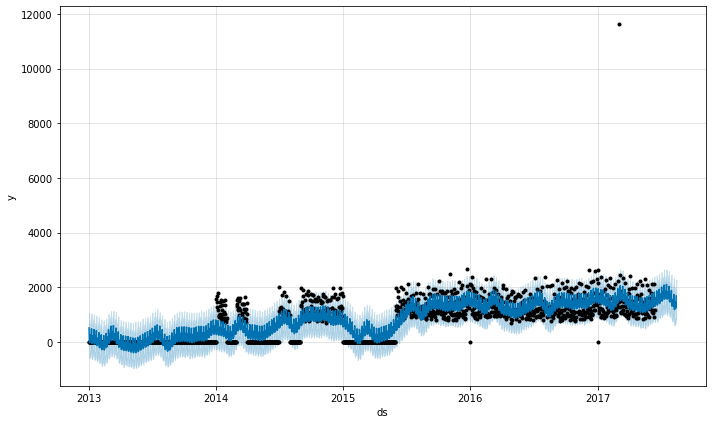

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

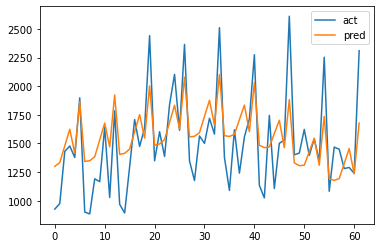

In [ ]:
pred_df = pd.DataFrame({'act': X_val['y'].values, 'pred': forecast['yhat'][-62:].values})
pred_df.plot()

In [ ]:
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.20377383523989204

Including holidays

In [ ]:
holidays = holidays.groupby(["date"]).max().reset_index() 
hd = holidays.rename(columns={'date': "ds"})
hd['holiday'] = hd['holiday'].astype("string")
hd.head()

ds holiday
0  2012-03-02       1
1  2012-04-01       2
2  2012-04-12       1
3  2012-04-14       1
4  2012-04-21       1

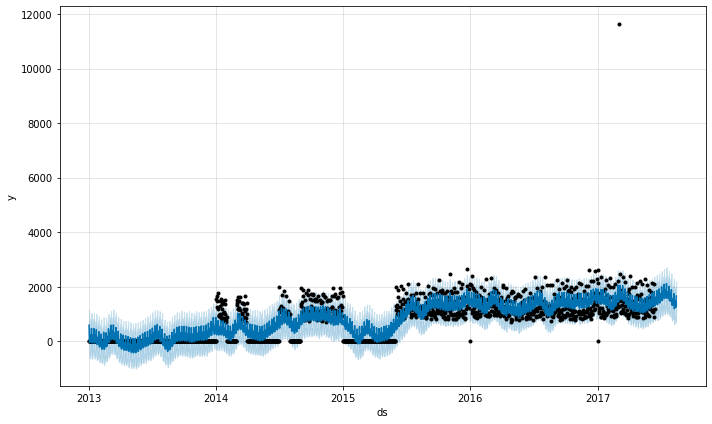

In [ ]:
m = Prophet(holidays=hd)
m.fit(X_train) 
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [ ]:
forecast.iloc[:5, [0, 6, 9, 12, 30]] #holidays effect

ds    1    2           3        yhat
0 2013-01-01  0.0  0.0  105.926992  590.535021
1 2013-01-02  0.0  0.0    0.000000  -45.920536
2 2013-01-03  0.0  0.0    0.000000  -48.785600
3 2013-01-04  0.0  0.0    0.000000  -31.184313
4 2013-01-05  0.0  0.0  105.926992  212.391997

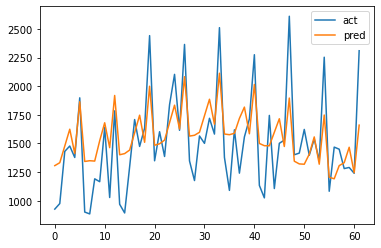

In [ ]:
pred_df = pd.DataFrame({'act': X_val['y'].values, 'pred': forecast['yhat'][-62:].values})
pred_df.plot()

In [ ]:
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.20332526874940118

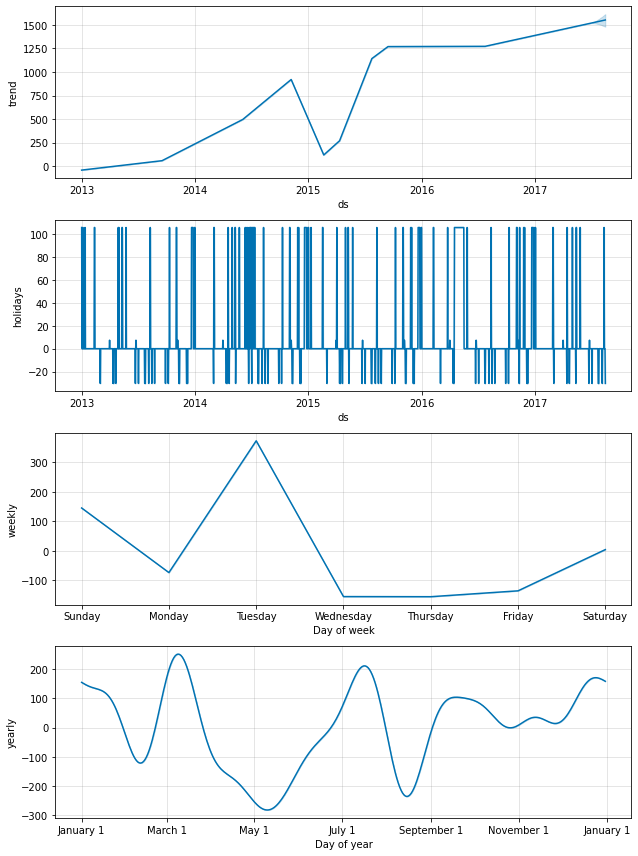

In [ ]:
fig2 = m.plot_components(forecast)

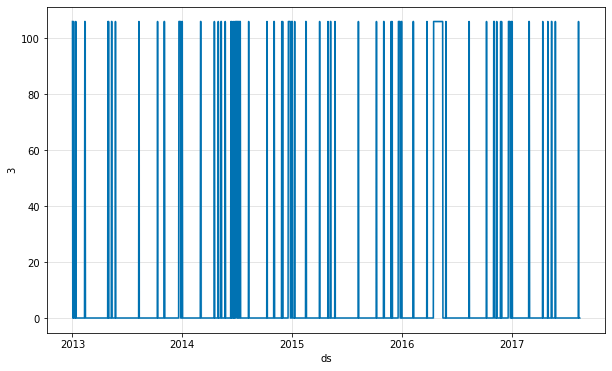

In [ ]:
fig3 = plot_forecast_component(m, forecast, '3')

Seasonalities are estimated using a partial Fourier sum. The default Fourier order for yearly seasonality is 10. The default values are often appropriate, but they can be increased when the seasonality needs to fit higher-frequency changes, and generally be less smooth. The Fourier order can be specified for each built-in seasonality when instantiating the model, here it is increased to 15:

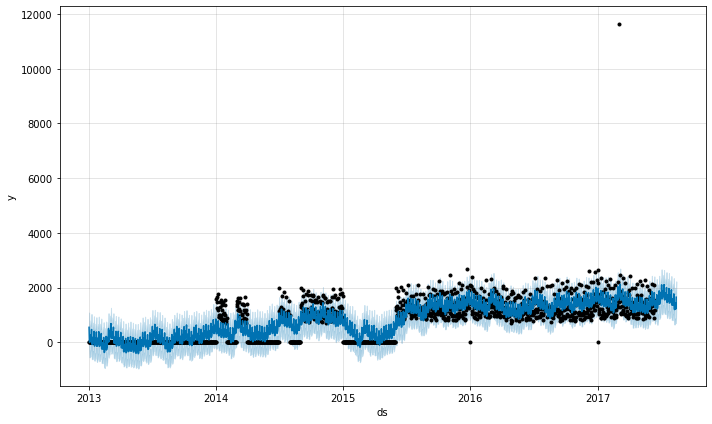

In [ ]:
m = Prophet(yearly_seasonality=15)
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
fig1 = m.plot(forecast)

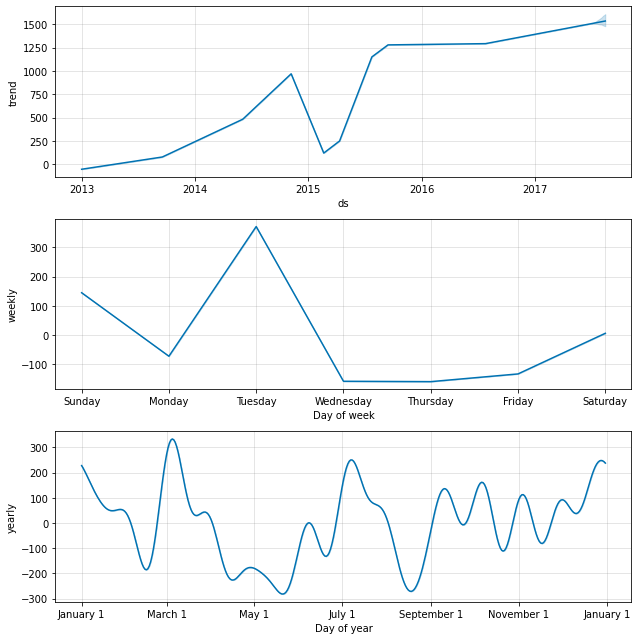

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.18631303069341526

In [ ]:
m = Prophet(holidays=hd, yearly_seasonality=15)
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.1926542778307432

Adding monthly seasonality

In [ ]:
m = Prophet(holidays=hd, yearly_seasonality=15)
m.add_seasonality(name='monthly', period=30.5, fourier_order=20)
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.18448644933543804

Adding more regressors

In [ ]:
X = train_temp[['date', 'sales', 'transactions', 'onpromotion', 'dcoilwtico']].reset_index()
X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True) #prophet requirement
X_train, X_val = X.iloc[:-62], X.iloc[-62:]

In [ ]:
m = Prophet(yearly_seasonality=15)
#m.add_regressor('transactions')
m.add_regressor('onpromotion')
#m.add_regressor('dcoilwtico')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
#future['transactions'] = X['transactions'].values
future['onpromotion'] = X['onpromotion'].values
#future['dcoilwtico'] = X['dcoilwtico'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.15845441224707651

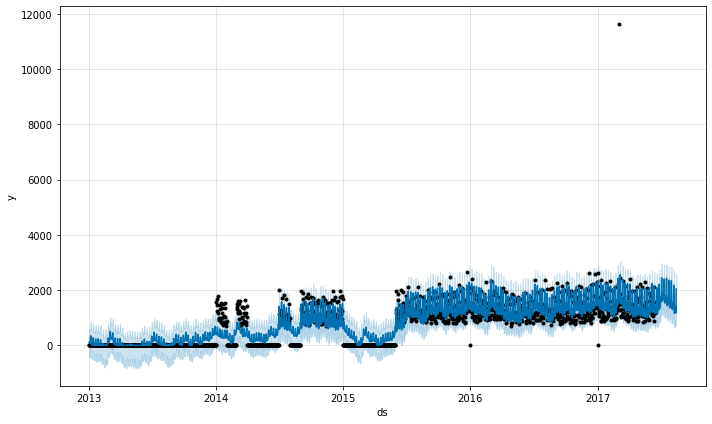

In [ ]:
fig1 = m.plot(forecast)

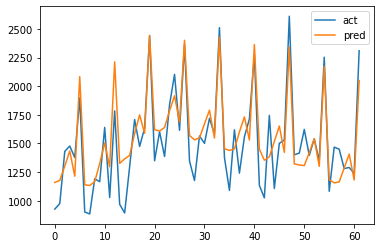

In [ ]:
pred_df = pd.DataFrame({'act': X_val['y'].values, 'pred': forecast['yhat'][-62:].values})
pred_df.plot()

You may have noticed that real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the changepoint_range argument.

In [ ]:
m = Prophet(yearly_seasonality=15, changepoint_range=0.9)
m.add_regressor('onpromotion')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.1732871221660952

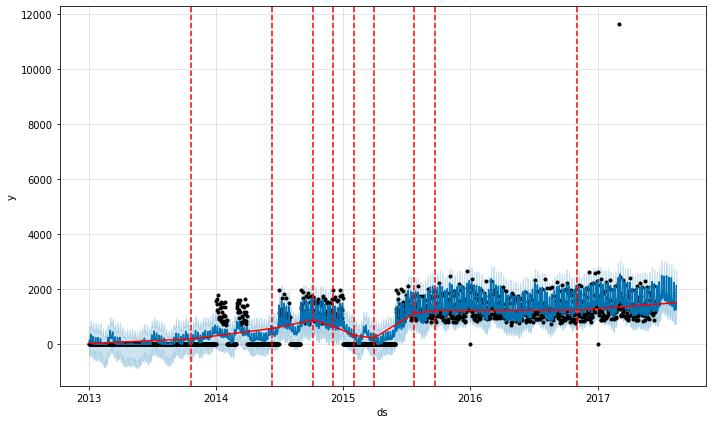

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible, decreasing it will make the trend less flexible:

In [ ]:
m = Prophet(yearly_seasonality=15, changepoint_range=0.9, changepoint_prior_scale=0.15)
m.add_regressor('onpromotion')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.16886659606136026

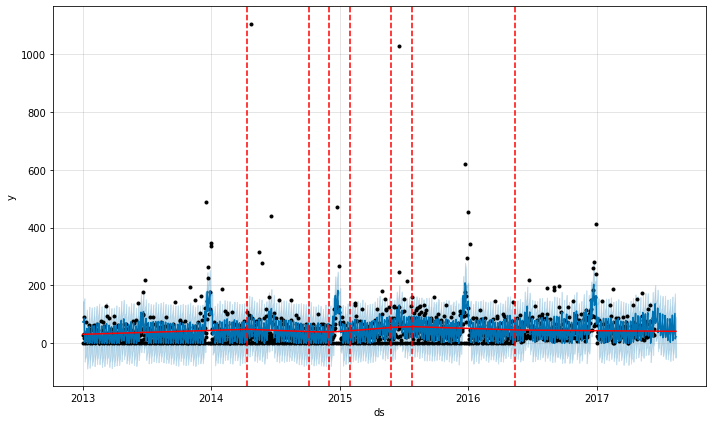

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(yearly_seasonality=15, changepoint_range=0.9, changepoint_prior_scale=0.01)
m.add_regressor('onpromotion')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

0.19359591382796593

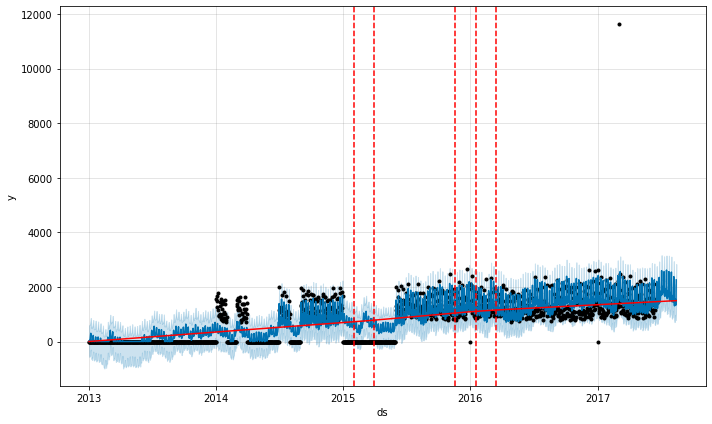

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
#m = Prophet(changepoints=['2014-01-01'])

##Hyperparameter tuning

In order to hyperparametres tuning, time series with one of the biggest error from LightGBM models is chosen: store: 32, family: 'LIQUOR,WINE,BEER' 

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day
train_temp = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 32) & (train_dates_wo_duplicates.family == 'LIQUOR,WINE,BEER')]
X = train_temp.reset_index()
X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True) #prophet requirement
X_train, X_val = X.iloc[:-62], X.iloc[-62:]

###Stepwise selection of regressors

Default model

In [ ]:
m = Prophet()
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

2.05855674308525

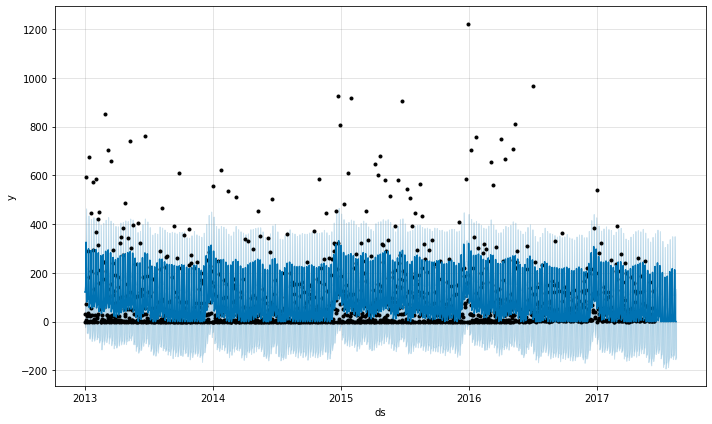

In [ ]:
fig = m.plot(forecast)

Including holidays -> worse

In [ ]:
holidays = holidays.groupby(["date"]).max().reset_index() 
hd = holidays.rename(columns={'date': "ds"})
hd['holiday'] = hd['holiday'].astype("string")

In [ ]:
m = Prophet(holidays=hd)
m.fit(X_train) 
future = m.make_future_dataframe(periods=62)
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

2.062993173302488

Adding `onpromotion` -> better

In [ ]:
X_train.columns

Index(['index', 'ds', 'store_nbr', 'family', 'y', 'onpromotion', 'dcoilwtico',
       'holiday', 'transactions', 'year', 'months', 'days'],
      dtype='object')

In [ ]:
m = Prophet()
#m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.add_regressor('onpromotion')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.9315966362570127

Adding `dcoilwtico` -> better

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.7959179437481616

Adding `transactions` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('transactions')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['transactions'] = X['transactions'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.9183567157702817

Adding `year` -> better

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['year'] = X['year'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.7391752900724615

Adding `months` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.add_regressor('months')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['year'] = X['year'].values
future['months'] = X['months'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.7626697259734136

Adding `days` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.add_regressor('days')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['year'] = X['year'].values
future['days'] = X['days'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.7395643711778026

Adding monthly seasonality -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['year'] = X['year'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.7850334459139416

### Best parameters search

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.fit(X_train)  
future = m.make_future_dataframe(periods=62)
future['onpromotion'] = X['onpromotion'].values
future['dcoilwtico'] = X['dcoilwtico'].values
future['year'] = X['year'].values
forecast = m.predict(future)
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X_val['y'], forecast['yhat'][-62:], squared=False)

1.3115181289441056

In [ ]:
param_grid = {  
    'seasonality_mode': ['multiplicative'],
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.15, 0.2],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'yearly_seasonality': [10, 15, 20],
    'changepoint_range': [0.8, 0.9]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
errors = []  

# Use cross validation to evaluate all parameters
for params in tqdm(all_params):
    m = Prophet(**params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('year')
    m.fit(X_train)  # Fit model with given params
    future = m.make_future_dataframe(periods=62)
    future['onpromotion'] = X['onpromotion'].values
    future['dcoilwtico'] = X['dcoilwtico'].values
    future['year'] = X['year'].values
    forecast = m.predict(future)
    #rmsle
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append(rmsle(X_val['y'], forecast['yhat'][-62:], squared=False))

100%|██████████| 120/120 [03:46<00:00,  1.89s/it]


In [ ]:
# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['errors'] = errors
# #print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(errors)]
print(best_params)
print(np.min(errors))

{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'yearly_seasonality': 15, 'changepoint_range': 0.9}
1.1194221302075475


##Training time series with best parameters

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
best_params = {'seasonality_mode': 'multiplicative',
               'changepoint_prior_scale': 0.05,
               'seasonality_prior_scale': 0.1,
               'yearly_seasonality': 15,
               'changepoint_range': 0.9}

In [ ]:
SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('year')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models

100%|██████████| 54/54 [42:43<00:00, 47.47s/it]


Forecasting

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [18:41<00:00, 20.77s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_wo_dup.csv') #0.60362

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.34401409419026036

In [ ]:
np.max(num_errors)

2.8868458555119543

In [ ]:
errors[np.argmax(num_errors)]

[26, 'FROZEN FOODS', 2.8868458555119543]

In [ ]:
sorted(num_errors)[-10:]

[1.1482719115896127,
 1.2454189227321006,
 1.2502455126536514,
 1.2632281143648114,
 1.3931308034130745,
 1.5686305844822224,
 1.7482255867419316,
 1.74997364725008,
 1.8485886475205773,
 2.8868458555119543]

## Training without outliers

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
best_params = {'seasonality_mode': 'multiplicative',
               'changepoint_prior_scale': 0.05,
               'seasonality_prior_scale': 0.1,
               'yearly_seasonality': 15,
               'changepoint_range': 0.9}

In [ ]:
SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('year')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models

100%|██████████| 54/54 [1:18:34<00:00, 87.31s/it]


Forecasting

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [19:41<00:00, 21.88s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_wo_out&dup.csv') #0.53946

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.32085373806770107

In [ ]:
np.max(num_errors)

1.4615573986926818

In [ ]:
errors[np.argmax(num_errors)]

[32, 'LIQUOR,WINE,BEER', 1.4615573986926818]

In [ ]:
sorted(num_errors)[-10:]

[0.9591117910186975,
 0.9592569252183226,
 0.9712538056912243,
 0.9760307314110036,
 0.9788752013950066,
 1.0311052239824656,
 1.0379165825029706,
 1.2098358799839668,
 1.2146148061962596,
 1.4615573986926818]

In [ ]:
# import joblib
# joblib.dump(SF_models,'PROmodels.joblib')
# joblib.dump(errors,'PROerrors.joblib')

['PROerrors.joblib']

## Hyperparameters tuning for timeseries without outliers and retraining

Hypeparameters tuning for sample time series for store & family with biggest error

In [ ]:
#1.461557
X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 32) & (train_dates_wo_duplicates.family == 'LIQUOR,WINE,BEER')]
X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
data = X[['ds', 'y']]
_, outliers = fit_predict_model(data)
outliers = detect_anomalies(outliers)
X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

Default model

In [ ]:
m = Prophet()
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.8429919335560647

Including holidays -> better

In [ ]:
holidays = holidays.groupby(["date"]).max().reset_index() 
hd = holidays.rename(columns={'date': "ds"})
hd['holiday'] = hd['holiday'].astype("string")

In [ ]:
m = Prophet(holidays=hd)
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.8242395872498902

Adding `onpromotion` -> better

In [ ]:
X.columns

Index(['ds', 'store_nbr', 'family', 'y', 'onpromotion', 'dcoilwtico',
       'holiday', 'transactions', 'year', 'months', 'days'],
      dtype='object')

In [ ]:
m = Prophet(holidays=hd)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.add_regressor('onpromotion')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.0702165840153604

In [ ]:
m = Prophet()
#m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.add_regressor('onpromotion')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.054435783097493

Adding `dcoilwtico` -> better

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.0176391304258803

In [ ]:
m = Prophet(holidays=hd)
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.019165959849981

Adding `transactions` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('transactions')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.2310508256200852

Adding `year` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('year')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.0205732510976986

Adding `months` -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
#m.add_regressor('year')
m.add_regressor('months')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.1460259129288224

Adding `days` -> better

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('days')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

0.9435468511235321

Adding monthly seasonality -> worse

In [ ]:
m = Prophet()
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('days')
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.0745105843892588

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_regressor('days')
m.fit(X) 
forecast = m.predict(X.iloc[-16:])
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
rmsle(X.y[-16:], forecast['yhat'], squared=False)

1.393837294588202

In [ ]:
param_grid = {  
    #'seasonality_mode': ['multiplicative'],
    'changepoint_prior_scale': [0.01, 0.05, 0.075, 0.1, 0.15, 0.2],
    'seasonality_prior_scale': [0.01, 0.1, 0.15, 1.0, 1.5, 10.0],
    'yearly_seasonality': [10, 15, 17, 20],
    'changepoint_range': [0.8, 0.9, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
errors = []  

for params in tqdm(all_params):
    m = Prophet(**params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  # Fit model with given params
    #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append(rmsle(X.y[-16:], forecast['yhat'], squared=False))

100%|██████████| 432/432 [08:45<00:00,  1.22s/it]


In [ ]:
# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['errors'] = errors
# #print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(errors)]
print(best_params)
print(np.min(errors))

{'changepoint_prior_scale': 0.2, 'seasonality_prior_scale': 0.01, 'yearly_seasonality': 10, 'changepoint_range': 0.95}
0.8735973570700002


### Retraining

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

In [ ]:
SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models

100%|██████████| 54/54 [1:19:26<00:00, 88.27s/it]


Forecasting

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [18:43<00:00, 20.81s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_wo_out&dup_v2.csv') #0.46209

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.33305109396476584

In [ ]:
np.max(num_errors)

1.6065883413836417

In [ ]:
errors[np.argmax(num_errors)]

[45, 'SCHOOL AND OFFICE SUPPLIES', 1.6065883413836417]

In [ ]:
sorted(num_errors)[-10:]

[1.0730865727370422,
 1.0851559924312604,
 1.1223125454072551,
 1.211333686104437,
 1.2949570719120362,
 1.3023435568261905,
 1.4643006058258796,
 1.4815090174832581,
 1.5894762424631954,
 1.6065883413836417]

### Retraining with different values of replaced outliers

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values
      X.loc[X['y'] < 0, 'y'] = 0
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_v3.csv') #0.45196

100%|██████████| 54/54 [21:53<00:00, 24.32s/it]


**Replacing outliers with None**

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None.csv') #0.44754

#### Searching optimal parameters for Prophet outliers detection

In [ ]:
def fit_predict_model(data, interval_width, changepoint_range):
   m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
               seasonality_mode = 'additive',
               interval_width=interval_width,
               changepoint_range=changepoint_range)
   m = m.fit(data)
   forecast = m.predict(data)
   forecast['actual'] = data['y'].reset_index(drop = True)
   return m, forecast

def detect_anomalies(forecast):
   forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'actual']].copy()
   forecasted['anomaly'] = 0
   forecasted.loc[forecasted['actual'] > forecasted['yhat_upper'], 'anomaly'] = -1
   forecasted.loc[forecasted['actual'] < forecasted['yhat_lower'], 'anomaly'] = -1
   return forecasted

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.95, changepoint_range=0.85)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v2.csv') #0.44427

100%|██████████| 54/54 [16:22<00:00, 18.19s/it]


In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.85, changepoint_range=0.85)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v3.csv') #0.44513

100%|██████████| 54/54 [18:10<00:00, 20.20s/it]


In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.95, changepoint_range=0.80)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v4.csv') #0.44336

100%|██████████| 54/54 [17:26<00:00, 19.38s/it]


In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.90, changepoint_range=0.80)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v5.csv') #0.44218

100%|██████████| 54/54 [16:43<00:00, 18.59s/it]


In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.85, changepoint_range=0.75)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v6.csv') #0.4427

100%|██████████| 54/54 [16:47<00:00, 18.66s/it]


In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.80, changepoint_range=0.80)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v7.csv') #0.44647

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data, interval_width = 0.70, changepoint_range=0.80)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_None_v8.csv') #0.45644

### Retraining with outliers replaced with values from week before

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

best_params = {'changepoint_prior_scale': 0.2,
               'seasonality_prior_scale': 0.01,
               'yearly_seasonality': 10,
               'changepoint_range': 0.95}

SF_models = {}
errors = []

for store in tqdm(stores):
  F_models = {}

  for family in families:
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      week_before = np.where(outliers.anomaly != 0)[0]-7
      week_before[week_before < 0] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values
      X.loc[X['y'] < 0, 'y'] = 0
        
    m = Prophet(**best_params)
    m.add_regressor('onpromotion')
    m.add_regressor('dcoilwtico')
    m.add_regressor('days')
    m.fit(X)  
    F_models[family] = m

    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    errors.append([store, family,
                   rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models



test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_v4.csv') # 0.45214

100%|██████████| 54/54 [21:35<00:00, 24.00s/it]


##Tuning for every single time series separately

In [ ]:
def hyp_tuning(data, regressors):
  
  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  param_grid = {  
      'seasonality_mode': ['multiplicative', 'additive'],
      'changepoint_prior_scale': [0.01, 0.05, 0.2],
      'seasonality_prior_scale': [0.01, 0.05, 0.1],
      'yearly_seasonality': [10, 15],
      'changepoint_range': [0.9, 0.95],
      'uncertainty_samples': [10] #for prediction speedup
  }

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  errors = [] 
  models = [] 

  for params in all_params:
      m = Prophet(**params)

      for reg in regressors:
        Prophet.add_regressor(m, reg)

      m.fit(data)  # Fit model with given params
      #rmsle
      forecast = m.predict(data.iloc[-16:])
      forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
      errors.append(rmsle(data.y[-16:], forecast['yhat'], squared=False))
      models.append(m)
  return np.min(errors), all_params[np.argmin(errors)], models[np.argmin(errors)]

regressors = [['onpromotion', 'dcoilwtico', 'days'], ['onpromotion', 'dcoilwtico', 'year']]

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
# 30 min/store
SF_models = {}
errors = []

for store in tqdm(stores[53:]):
  F_models = {}

  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

    #searching best model
    hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
    outcome = sorted(hp, key=lambda x: x[0])[0]

    F_models[family] = outcome[2]

    errors.append([store, family, outcome[0]])

  SF_models[store] = F_models
  joblib.dump(SF_models, f'PROmodels_sep_54.joblib')
  joblib.dump(errors, f'PROerrors_sep_54.joblib');

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 1/1 [18:35<00:00, 1115.29s/it]


In [ ]:
# def train_family (store, family):

#     X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
#     X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
#     #replace outliers
#     data = X[['ds', 'y']]
#     _, outliers = fit_predict_model(data)
#     outliers = detect_anomalies(outliers)

#     if sum(outliers.anomaly) !=0:
#       X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

#     #searching best model
#     hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
#     outcome = sorted(hp, key=lambda x: x[0])[0]
#     F_model = outcome[2]
#     F_error = outcome[0]

#     return store, family, F_model, F_error

# def train_store(store):
#     outcome = Parallel(n_jobs=-1)(delayed(train_family)(store, family) for family in families[:2])    
#     joblib.dump(outcome, f'PROmodels_sep_{store}.joblib')
#     return outcome

In [ ]:
# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [ ]:
#45 min/store
# from tqdm.contrib.concurrent import process_map
# result = process_map(train_store, stores[:1])

#https://medium.com/@harshit4084/track-your-loop-using-tqdm-7-ways-progress-bars-in-python-make-things-easier-fcbbb9233f24

  0%|          | 0/1 [00:00<?, ?it/s]

Forecasting

In [ ]:
filenames = next(os.walk('.'), (None, None, []))[2]

SF_models = {}
errors = []
for filename in filenames:
  if filename.startswith('PROmodels_sep_'):
    temp = joblib.load(filename)
    SF_models = dict(chain.from_iterable(d.items() for d in (SF_models, temp)))
  if filename.startswith('PROerrors_sep_'):
    temp = joblib.load(filename)
    errors = errors + temp

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [02:15<00:00,  2.50s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_sep.csv')  #0.52458 worse!

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.28995690675509844

In [ ]:
np.max(num_errors)

1.1519812515264771

In [ ]:
errors[np.argmax(num_errors)]

[19, 'GROCERY II', 1.1519812515264771]

In [ ]:
sorted(num_errors)[-10:]

[0.8397920026964083,
 0.8412881789975241,
 0.858922074430843,
 0.8932835861599994,
 0.9127290246383915,
 0.9249003315120388,
 0.9613370097248229,
 0.9635090845465216,
 0.9796220250262819,
 1.1519812515264771]

### Outliers replaced with values from week before

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores[41:], position=0):
  F_models = {}

  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values

    #searching best model
    hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
    outcome = sorted(hp, key=lambda x: x[0])[0]

    F_models[family] = outcome[2]

    errors.append([store, family, outcome[0]])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_sep_42_54.joblib')
  joblib.dump(errors,'PROerrors_sep_42_54.joblib');

In [ ]:
filenames = next(os.walk('.'), (None, None, []))[2]

SF_models = {}
errors = []
for filename in filenames:
  if filename.startswith('PROmodels_sep_'):
    temp = joblib.load(filename)
    SF_models = dict(chain.from_iterable(d.items() for d in (SF_models, temp)))
  if filename.startswith('PROerrors_sep_'):
    temp = joblib.load(filename)
    errors = errors + temp

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [01:59<00:00,  2.21s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_sep_7days.csv')  #0.49361 worse!

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.27912310312347927

In [ ]:
np.max(num_errors)

1.7722296641114226

In [ ]:
errors[np.argmax(num_errors)]

[44, 'SCHOOL AND OFFICE SUPPLIES', 1.7722296641114226]

In [ ]:
sorted(num_errors)[-10:]

[0.9190464992381013,
 0.9269260191619745,
 0.9718193014884986,
 1.1124109151519797,
 1.5644094131713058,
 1.5865855778727755,
 1.6197782703519854,
 1.6334497979177762,
 1.7459655867438617,
 1.7722296641114226]

## Tuning one global model for every store

The hyperparameter tunning is performed for family with the highest sales - `GROCERY I`

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):
  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family ==  'GROCERY I')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  data = X[['ds', 'y']]
  _, outliers = fit_predict_model(data)
  outliers = detect_anomalies(outliers)
 

  if sum(outliers.anomaly) !=0:
            X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values
            X.loc[X['y'] < 0, 'y'] = 0
            
  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
            X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values
            X.loc[X['y'] < 0, 'y'] = 0

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    forecast.loc[forecast['yhat'] > 1e10, 'yhat'] = 0
    forecast.loc[np.isnan(forecast['yhat']), 'yhat'] = 0

    F_models[family] = m
  
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models

test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_global_trend.csv') #0.45996

Outliers replaced by values from week before

In [ ]:
def hyp_tuning(data, regressors):
  
  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  param_grid = {  
      'seasonality_mode': ['multiplicative', 'additive'],
      'changepoint_prior_scale': [0.01, 0.05, 0.2],
      'seasonality_prior_scale': [0.01, 0.05, 0.1],
      'yearly_seasonality': [10, 15],
      'changepoint_range': [0.9, 0.95],
      'uncertainty_samples': [10] #for prediction speedup
  }

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  errors = [] 
  models = [] 
  re = []

  for params in all_params:
      m = Prophet(**params)

      for reg in regressors:
        Prophet.add_regressor(m, reg)

      m.fit(data)  # Fit model with given params
      #rmsle
      forecast = m.predict(data.iloc[-16:])
      forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
      errors.append(rmsle(data.y[-16:], forecast['yhat'], squared=False))
      models.append(m)
        
  return np.min(errors), all_params[np.argmin(errors)], models[np.argmin(errors)], regressors
            #0               1                            2                          3
regressors = [['onpromotion', 'dcoilwtico', 'days'], ['onpromotion', 'dcoilwtico', 'year']]

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):
  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family ==  'GROCERY I')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  data = X[['ds', 'y']]
  _, outliers = fit_predict_model(data)
  outliers = detect_anomalies(outliers)
 

  if sum(outliers.anomaly) !=0:
      week_before = np.where(outliers.anomaly != 0)[0]-7
      week_before[week_before < 0] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values

  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      week_before = np.where(outliers.anomaly != 0)[0]-7
      week_before[week_before < 0] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values


    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m

    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_global.joblib')
  joblib.dump(errors,'PROerrors_global.joblib');

In [ ]:
SF_models = joblib.load('PROmodels_global.joblib')
errors = joblib.load('PROerrors_global.joblib')

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [01:36<00:00,  1.79s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_global_7days.csv')  # 0.47413

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.33087922276318676

In [ ]:
np.max(num_errors)

3.2094443316193755

In [ ]:
errors[np.argmax(num_errors)]

[50, 'SCHOOL AND OFFICE SUPPLIES', 3.2094443316193755]

In [ ]:
sorted(num_errors)[-10:]

[1.5997005292970463,
 1.653197545397943,
 1.8576145844086989,
 2.111530595970916,
 2.176793403036144,
 2.21153305777792,
 2.2232825685439983,
 2.3188341099642367,
 3.175014927556832,
 3.2094443316193755]

The hyperparameter tunning performed for family with the second highest sales - `BEVERAGES`

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family ==  'BEVERAGES')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  data = X[['ds', 'y']]
  _, outliers = fit_predict_model(data)
  outliers = detect_anomalies(outliers)
 

  if sum(outliers.anomaly) !=0:
      week_before = np.where(outliers.anomaly != 0)[0]-7
      week_before[week_before < 0] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values

  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      week_before = np.where(outliers.anomaly != 0)[0]-7
      week_before[week_before < 0] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = X.y.iloc[week_before].values


    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m

    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_global_bev.joblib')
  joblib.dump(errors,'PROerrors_global_bev.joblib');

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
SF_models = joblib.load('PROmodels_global_bev.joblib')
errors = joblib.load('PROerrors_global_bev.joblib')

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [01:51<00:00,  2.07s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_global_7days_bev.csv')  #0.48301 

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.32776009300217707

In [ ]:
np.max(num_errors)

3.054925994776684

In [ ]:
errors[np.argmax(num_errors)]

[50, 'SCHOOL AND OFFICE SUPPLIES', 3.054925994776684]

In [ ]:
sorted(num_errors)[-10:]

[1.5202631665910546,
 1.6331036923226585,
 1.6639279494879569,
 1.9973866194077223,
 2.0999895089761633,
 2.1186491191765358,
 2.1745555008720903,
 2.3083020238731633,
 3.0240218740350917,
 3.054925994776684]

**Replacing outliers with None**

In [ ]:
#global models per store, outliers from prophet
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):
  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family ==  'GROCERY I')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  data = X[['ds', 'y']]
  _, outliers = fit_predict_model(data)
  outliers = detect_anomalies(outliers)
 

  if sum(outliers.anomaly) !=0:
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None

  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    data = X[['ds', 'y']]
    _, outliers = fit_predict_model(data)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[X['y'] < 0, 'y'] = 0
      X.loc[(outliers.anomaly != 0).values, 'y'] = None

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models

test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_global_None.csv') #0.47165

###Outliers detection with Isolation Forest

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])
train_dates_wo_duplicates['year'] = dates.year
train_dates_wo_duplicates['months'] = dates.month
train_dates_wo_duplicates['days'] = dates.day

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
# if week-before value is also outliers, then shift another 7 days before
def shift_outliers(out_ind, j):
  if j in out_ind:
    j = j - 7
    return shift_outliers(out_ind, j)
  return j 

def outliers_replacing(X, cont):
  out = X.copy()
  scaler = StandardScaler()
  X['ds'] = X.ds.dt.strftime('%Y%m%d')
  X=X.drop(columns=['family'])
  X_scaled = scaler.fit_transform(X)
  model =  IsolationForest(contamination=cont) #% of data - outliers
  model.fit(X_scaled)
  X['anomaly'] = model.predict(X_scaled)
  #replacing
  out_ind = np.where(X.anomaly == -1)[0]
  week_before = []
  for i in out_ind:
      j = i - 7
      j = shift_outliers(out_ind, j)
      week_before.append(j) 
  week_before = [0 if v < 0 else v for v in week_before] 
  out.loc[(X.anomaly == -1).values, 'y'] = out.y.iloc[week_before].values
  return out

In [ ]:
X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 11) & (train_dates_wo_duplicates.family == 'SCHOOL AND OFFICE SUPPLIES')]
X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)

In [ ]:
X['ds'] = X.ds.dt.strftime('%Y%m%d')

In [ ]:
X=X.drop(columns=['family'])

In [ ]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(X)

In [ ]:
model =  IsolationForest(contamination=0.05)
model.fit(np_scaled)

IsolationForest(contamination=0.05)

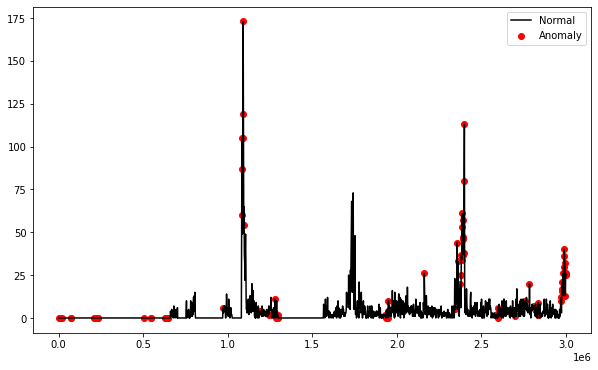

In [ ]:
X['anomaly'] = model.predict(np_scaled)
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = X.loc[X['anomaly'] == -1, ['y']] #anomaly
ax.plot(X.index, X['y'], color='black', label = 'Normal')
ax.scatter(a.index, a['y'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
sum(X.anomaly == -1)

85

In [ ]:
out_ind = np.where(X.anomaly == -1)[0]
week_before = []
for i in out_ind:
    j = i - 7
    j = shift_outliers(out_ind, j)
    week_before.append(j) 


week_before = [0 if v < 0 else v for v in week_before] 
X.loc[(X.anomaly == -1).values, 'y'] = X.y.iloc[week_before].values

In [ ]:
set(out_ind).intersection(set(week_before))

{0}

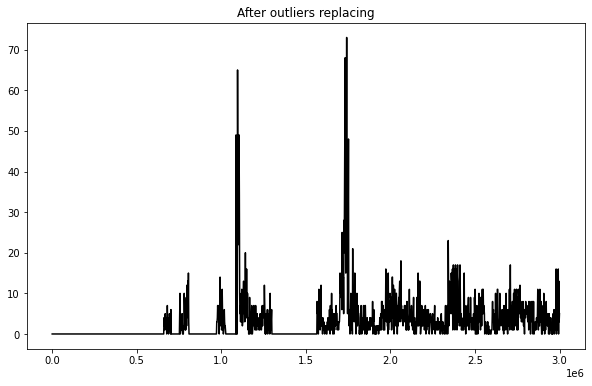

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X.index, X['y'], color='black')
plt.title("After outliers replacing");

The hyperparameter tunning is performed for family with the highest sales - `SCHOOL AND OFFICE SUPPLIES`, 5% of data as outliers

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == 'SCHOOL AND OFFICE SUPPLIES')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  X = outliers_replacing(X, 0.05)
  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    X = outliers_replacing(X, 0.05)

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m

    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_global_diffrepl.joblib')
  joblib.dump(errors,'PROerrors_global_diffrepl.joblib');

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
SF_models = joblib.load('PROmodels_global_diffrepl.joblib')
errors = joblib.load('PROerrors_global_diffrepl.joblib')

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [02:03<00:00,  2.29s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_global_IF_5.csv')  #0.61171

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.3251802099476419

In [ ]:
errors[np.argmax(num_errors)]

[45, 'SCHOOL AND OFFICE SUPPLIES', 2.088418878617824]

In [ ]:
sorted(num_errors)[-10:]

[1.0878165385751777,
 1.0883657705186414,
 1.1237109606792828,
 1.131424736340222,
 1.169685753032504,
 1.1954800439106277,
 1.3574968669228245,
 1.4980028306304105,
 1.671210900955864,
 2.088418878617824]

10% of data as outliers

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == 'SCHOOL AND OFFICE SUPPLIES')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  X = outliers_replacing(X, 0.1)
  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    X = outliers_replacing(X, 0.1)

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m

    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_global_IF10.joblib')
  joblib.dump(errors,'PROerrors_global_IF10.joblib');

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
SF_models = joblib.load('PROmodels_global_IF10.joblib')
errors = joblib.load('PROerrors_global_IF10.joblib')

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [02:13<00:00,  2.46s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_global_IF_10.csv')  # 0.6799 much worse!

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.31739648088766664

In [ ]:
errors[np.argmax(num_errors)]

[52, 'CLEANING', 4.093816762222759]

In [ ]:
sorted(num_errors)[-10:]

[1.1616007301386968,
 1.3294873739535518,
 1.5755562747908871,
 1.6681294560644984,
 1.9185068512433519,
 1.9309264717546841,
 3.285259547240717,
 3.746106495537378,
 3.7680494060530485,
 4.093816762222759]

7% of data as outliers

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == 'SCHOOL AND OFFICE SUPPLIES')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  X = outliers_replacing(X, 0.07)
  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    X = outliers_replacing(X, 0.07)

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m

    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  joblib.dump(SF_models,'PROmodels_global_IF7.joblib')
  joblib.dump(errors,'PROerrors_global_IF7.joblib');

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
SF_models = joblib.load('PROmodels_global_IF7.joblib')
errors = joblib.load('PROerrors_global_IF7.joblib')

In [ ]:
len(SF_models)

54

In [ ]:
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

In [ ]:
forecast = test_dates.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

100%|██████████| 54/54 [02:11<00:00,  2.43s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0

In [ ]:
forecast.sales.to_csv('prophet_hypparams_tuned_global_IF_7.csv')  #0.64724

In [ ]:
num_errors = [e[2] for e in errors]

In [ ]:
np.mean(num_errors)

0.3179229236598123

In [ ]:
errors[np.argmax(num_errors)]

[36, 'LIQUOR,WINE,BEER', 2.153673895534467]

In [ ]:
sorted(num_errors)[-10:]

[1.0469803306658299,
 1.059648194961645,
 1.1273568217036274,
 1.1776091809715197,
 1.1780058707251269,
 1.2797928885989063,
 1.7345451994049124,
 1.7642290359863333,
 1.961294568031726,
 2.153673895534467]

**Replacing outliers with None**

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}
  X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == 'SCHOOL AND OFFICE SUPPLIES')]
  X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
  #replace outliers
  X = outliers_replacing(X, 0.05)
  #searching best model
  hp = Parallel(n_jobs=-1)(delayed(hyp_tuning)(X, r) for r in regressors)
  outcome = sorted(hp, key=lambda x: x[0])[0]
  regres = outcome[3]
  best_params = outcome[1]
    
  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    X = outliers_replacing(X, 0.05)

    m = Prophet(**best_params)

    for reg in regres:
        Prophet.add_regressor(m, reg)

    m.fit(X)  # Fit model with given params
      #rmsle
    forecast = m.predict(X.iloc[-16:])
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0

    F_models[family] = m
    X.loc[np.isnan(X['y']), 'y'] = 0
    errors.append([store, family, rmsle(X.y[-16:], forecast['yhat'], squared=False)])

  SF_models[store] = F_models
  
test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])
test_dates['year'] = dates.year
test_dates['months'] = dates.month
test_dates['days'] = dates.day

forecast = test_dates.copy()
forecast['sales'] = 0

for store in tqdm(stores):
  for family in families:
    data = test_dates[(test_dates.store_nbr == store) & (test_dates.family == family)]
    data.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    preds = SF_models[store][family].predict(data)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.yhat.values

forecast[forecast['sales'] < 0] = 0

forecast.sales.to_csv('prophet_wo_out&dup_global_IF_None.csv') #0.54113    

#Exponential Smoothing

In [ ]:
train_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 

train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 11) & (train_wo_duplicates.family == 'PRODUCE')]
X = train_temp[['sales', 'date']].set_index('date')
X_train, X_val = X.iloc[:-62], X.iloc[-62:]

In [ ]:
model = ExponentialSmoothing(X_train, trend="add", seasonal="add", seasonal_periods=7)
model2 = ExponentialSmoothing(X_train, trend="add", seasonal="add", seasonal_periods=7, damped=True)
fit = model.fit()
pred = fit.forecast(62)
fit2 = model2.fit()
pred2 = fit2.forecast(62)

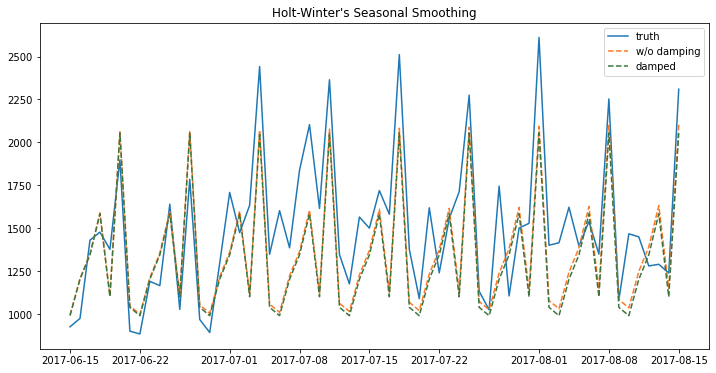

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
#ax.plot(train.index[60:], train.values[60:]);
ax.plot(X_val.index, X_val.values, label='truth');
ax.plot(X_val.index, pred, linestyle='--', color='#ff7823', label="w/o damping");
ax.plot(X_val.index, pred2, linestyle='--', color='#3c763d', label="damped"); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

In [ ]:
print("RMSLE of model w/o damping", rmsle(X_val, pred, squared=False))
print("RMSLE of damped model", rmsle(X_val, pred2, squared=False))

RMSLE of model w/o damping 0.20033741987769943
RMSLE of damped model 0.21409019535781584


In [ ]:
model3 = ExponentialSmoothing(X_train, trend="add", seasonal="add", seasonal_periods=11)
fit3 = model3.fit()
pred3 = fit3.forecast(62)

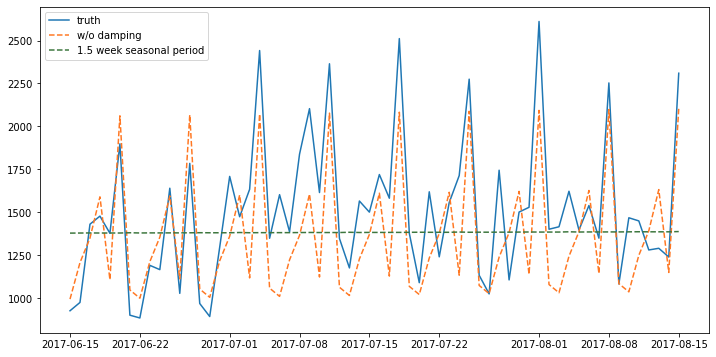

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X_val.index, X_val.values, label='truth');
ax.plot(X_val.index, pred, linestyle='--', color='#ff7823', label="w/o damping");
ax.plot(X_val.index, pred3, linestyle='--', color='#3c763d', label="1.5 week seasonal period"); 
ax.legend();

In [ ]:
print("RMSLE of 1.5 week seasonal period model", rmsle(X_val, pred3, squared=False))

RMSLE of 1.5 week seasonal period model 0.2680983713418352


In [ ]:
model4 = ExponentialSmoothing(X_train, trend="add", seasonal="add", seasonal_periods=14)
fit4 = model4.fit()
pred4 = fit4.forecast(62)

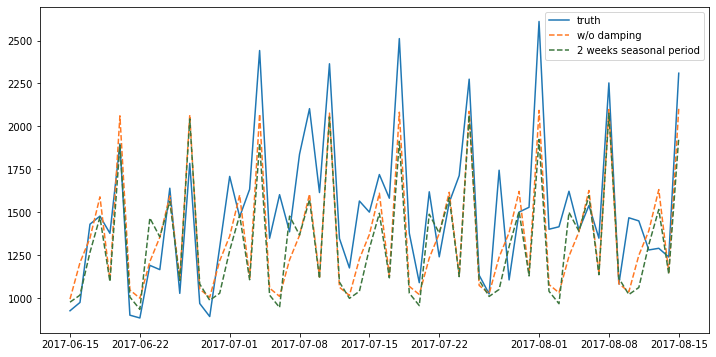

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X_val.index, X_val.values, label='truth');
ax.plot(X_val.index, pred, linestyle='--', color='#ff7823', label="w/o damping");
ax.plot(X_val.index, pred4, linestyle='--', color='#3c763d', label="2 weeks seasonal period"); 
ax.legend();

In [ ]:
print("RMSLE of 2 weeks seasonal period model", rmsle(X_val, pred4, squared=False))

RMSLE of 2 weeks seasonal period model 0.22230387628876064


In [ ]:
model5 = ExponentialSmoothing(X_train + 1e-6, trend="add", seasonal="multiplicative", seasonal_periods=7)
fit5 = model5.fit()
pred5 = fit5.forecast(62)

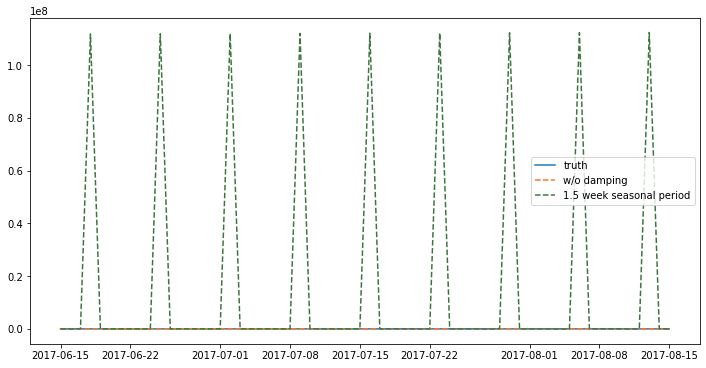

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X_val.index, X_val.values, label='truth');
ax.plot(X_val.index, pred, linestyle='--', color='#ff7823', label="w/o damping");
ax.plot(X_val.index, pred5, linestyle='--', color='#3c763d', label="1.5 week seasonal period"); 
ax.legend();

In [ ]:
pred5[pred5 < 0] = 0
print("RMSLE of seasonal trend model", rmsle(X_val, pred5, squared=False))

RMSLE of seasonal trend model 5.704039505390995


##Training for every time series separately

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

In [ ]:
def fit_model(data, params):

  model = ExponentialSmoothing(data + 1e-6, **params)
  forecast = model.fit(method='L-BFGS-B', use_brute=True).predict(start=len(data)-15, end=len(data))
  forecast[forecast < 0] = 0
  forecast[forecast > 1e10] = 0
  forecast[np.isnan(forecast)] = 0
  error = (rmsle(data.y[-16:], forecast, squared=False))

  return error, model 

def hyp_tuning(data):
  
  if all(data.values[0] == data.values): 
    param_grid = {  
        'trend': ['additive'],
        'seasonal': ['additive', 'multiplicative'],
        'seasonal_periods': [7, 14],
        'damped_trend': [True, False],
        'initialization_method': ['estimated'],
      # 'use_boxcox': [False, 0.1, 0.25, 0.4],
    }
  else:
    param_grid = {  
        'trend': ['additive'],
        'seasonal': ['additive', 'multiplicative'],
        'seasonal_periods': [7, 14],
        'damped_trend': [True, False],
        'initialization_method': ['estimated'],
        'use_boxcox': [False, 0.1, 0.25, 0.4]
    }

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

  # Use cross validation to evaluate all parameters
  fm = Parallel(n_jobs=-1)(delayed(fit_model)(data, params) for params in all_params)
  outcome = sorted(fm, key=lambda x: x[0])[0]
  min_error = outcome[0]
  best_model = outcome[1]

  return min_error, best_model

In [ ]:
SF_models = {}
errors = []

for store in tq.tqdm(stores, position=0):
  F_models = {}

  for family in tq.tqdm(families, position=1):

    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    X = X[['ds', 'y']]
    _, outliers = fit_predict_model(X)
    outliers = detect_anomalies(outliers)

    if sum(outliers.anomaly) !=0:
      X.loc[(outliers.anomaly != 0).values, 'y'] = outliers.loc[outliers.anomaly != 0, 'yhat'].values[0]

    X = X.set_index('ds')
    X.index = pd.DatetimeIndex(X.index).to_period('D')

    #searching best model
    error, model = hyp_tuning(X)

    F_models[family] = model

    errors.append([store, family, error])


  SF_models[store] = F_models
  joblib.dump(SF_models, f'EXPSmodels_sep.joblib')
  joblib.dump(errors, f'EXPSerrors_sep.joblib');

###Forecasting

In [ ]:
filenames = next(os.walk('.'), (None, None, []))[2]

SF_models = {}
errors = []
for filename in filenames:
  if filename.startswith('EXPSmodels_sep'):
    temp = joblib.load(filename)
    SF_models = dict(chain.from_iterable(d.items() for d in (SF_models, temp)))
  if filename.startswith('EXPSerrors_sep'):
    temp = joblib.load(filename)
    errors = errors + temp

In [ ]:
forecast = test.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    preds = SF_models[store][family].fit(method='L-BFGS-B', use_brute=True).forecast(16)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.values

100%|██████████| 54/54 [12:41<00:00, 14.10s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0
forecast[forecast['sales'] > 1e10] = 0
forecast[np.isnan(forecast['sales'])] = 0

In [ ]:
forecast.sales.to_csv('EXPSMOOTH_hypparams_tuned_sep.csv')  #0.58303 worse!

**Forecasting with different range**

In [ ]:
forecast = test.copy()
forecast['sales'] = 0

In [ ]:
for store in tqdm(stores):
  for family in families:
    preds = SF_models[store][family].fit(method='L-BFGS-B', use_brute=True).predict(start=1684, end=1699)
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = preds.values

100%|██████████| 54/54 [12:57<00:00, 14.40s/it]


In [ ]:
forecast[forecast['sales'] < 0] = 0
forecast[forecast['sales'] > 1e10] = 0
forecast[np.isnan(forecast['sales'])] = 0

In [ ]:
forecast.sales.to_csv('EXPSMOOTH_hypparams_tuned_sep_v2.csv') #0.52817

#NumPyro: Bayesian Exponential Smoothing Models with Trend Modifications 

In [33]:
def sgt(y, seasonality, future=0):
    # heuristically, standard derivation of Cauchy prior depends on
    # the max value of data
    #cauchy_sd = jnp.max(y) / 150
    cauchy_sd = 2*jnp.median(y)

    # NB: priors' parameters are taken from
    # https://github.com/cbergmeir/Rlgt/blob/master/Rlgt/R/rlgtcontrol.R
    nu = numpyro.sample("nu", dist.Uniform(2, 30))
    powx = numpyro.sample("powx", dist.Uniform(0, 1))
    sigma = numpyro.sample("sigma", dist.HalfCauchy(cauchy_sd))
    offset_sigma = numpyro.sample(
        "offset_sigma", dist.TruncatedCauchy(low=1e-10, loc=1e-10, scale=cauchy_sd)
    )

    coef_trend = numpyro.sample("coef_trend", dist.Cauchy(0, cauchy_sd))
    pow_trend_beta = numpyro.sample("pow_trend_beta", dist.Beta(1, 1))
    # pow_trend takes values from -0.5 to 1
    pow_trend = 1.5 * pow_trend_beta - 0.5
    pow_season = numpyro.sample("pow_season", dist.Beta(1, 1))

    level_sm = numpyro.sample("level_sm", dist.Beta(1, 2))
    s_sm = numpyro.sample("s_sm", dist.Uniform(0, 1))
    init_s = numpyro.sample("init_s", dist.Cauchy(0, y[:seasonality] * 0.3))

    def transition_fn(carry, t):
        level, s, moving_sum = carry
        season = s[0] * level**pow_season
        exp_val = level + coef_trend * level**pow_trend + season
        #exp_val = jnp.clip(exp_val, a_min=0)
        exp_val = jnp.where(exp_val > 0, exp_val, 2*jnp.median(y))
        # use expected value when forecasting
        y_t = jnp.where(t >= N, exp_val, y[t])

        moving_sum = (
            moving_sum + y[t] - jnp.where(t >= seasonality, y[t - seasonality], 0.0)
        )
        level_p = jnp.where(t >= seasonality, moving_sum / seasonality, y_t - season)
        level = level_sm * level_p + (1 - level_sm) * level
        level = jnp.clip(level, a_min=0)

        new_s = (s_sm * (y_t - level) / season + (1 - s_sm)) * s[0]
        # repeat s when forecasting
        new_s = jnp.where(t >= N, s[0], new_s)
        s = jnp.concatenate([s[1:], new_s[None]], axis=0)

        omega = sigma * exp_val**powx + offset_sigma
        y_ = numpyro.sample("y", dist.StudentT(nu, exp_val, omega))

        return (level, s, moving_sum), y_

    N = y.shape[0]
    #level_init = y[0]
    #level_init = jnp.median(y) 
    level_init = 0
    s_init = jnp.concatenate([init_s[1:], init_s[:1]], axis=0)
    moving_sum = level_init
    with numpyro.handlers.condition(data={"y": y[1:]}):
        _, ys = scan(
            transition_fn, (level_init, s_init, moving_sum), jnp.arange(1, N + future)
        )
    if future > 0:
        numpyro.deterministic("y_forecast", ys[-future:])

In [ ]:
train_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 

train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 11) & (train_wo_duplicates.family == 'PRODUCE')]
X = train_temp[['sales', 'date']].set_index('date')
X_train, X_val = X.iloc[:-62], X.iloc[-62:]

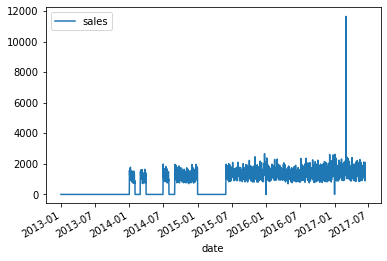

In [ ]:
X_train.plot()

In [ ]:
#X_train.sales.iloc[X_train.sales < 1] = X_train.sales.median()*1.5

In [ ]:
print("Lag values with highest autocorrelation values:\n")
print(jnp.argsort(autocorrelation(X_train.values[:, 0]))[-10:])

Lag values with highest autocorrelation values:

[ 6 21  4  3  5  1 14  2  7  0]


In [ ]:
y_train = jnp.array(X_train.values[:, 0], dtype=jnp.float64)

In [ ]:
kernel = NUTS(sgt)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4)
mcmc.run(random.PRNGKey(2023), y_train, seasonality=14)
samples = mcmc.get_samples()

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

In [ ]:
mcmc.print_summary()

In [ ]:
predictive = Predictive(sgt, samples, return_sites=["y_forecast"])
forecast_marginal = predictive(random.PRNGKey(0), y_train, seasonality=14, future=62)["y_forecast"]

In [ ]:
forecast_marginal = forecast_marginal.at[jnp.isnan(forecast_marginal)].set(1.5*jnp.median(X_train.values))

In [ ]:
y_pred = jnp.mean(forecast_marginal, axis=0)

In [ ]:
#y_pred = y_pred.at[jnp.isnan(y_pred)].set(1.5*jnp.median(X_train.values))

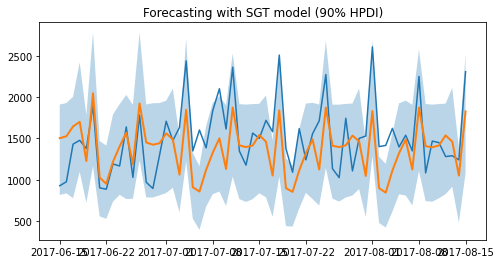

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(X_val.index, X_val.sales)
hpd_low, hpd_high = hpdi(forecast_marginal)
plt.plot(X_val.index, y_pred, lw=2)
plt.fill_between(X_val.index, hpd_low, hpd_high, alpha=0.3)
plt.title("Forecasting with SGT model (90% HPDI)")
plt.show()

In [ ]:
print("RMSLE", rmsle(X_val, y_pred, squared=False))

RMSLE 0.2732003123794458


In [ ]:
train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 11) & (train_wo_duplicates.family == 'GROCERY I')]
X = train_temp[['sales', 'date']].set_index('date')
X_train, X_val = X.iloc[:-62], X.iloc[-62:]
print("Lag values with highest autocorrelation values:\n")
print(jnp.argsort(autocorrelation(X_train.values[:, 0]))[-10:])

Lag values with highest autocorrelation values:

[335 426  63  91  28 726 364   1 363   0]


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

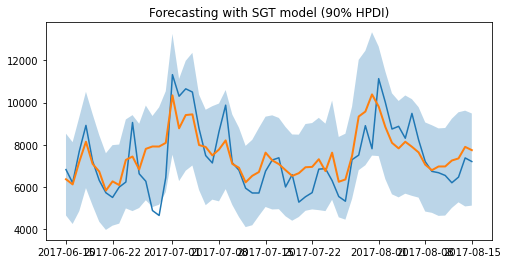

RMSLE 0.15150993141748556


In [ ]:
SEAS = 363
y_train = jnp.array(X_train.values[:, 0], dtype=jnp.float64)
kernel = NUTS(sgt)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4)
mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
samples = mcmc.get_samples()
predictive = Predictive(sgt, samples, return_sites=["y_forecast"])
forecast_marginal = predictive(random.PRNGKey(0), y_train, seasonality=SEAS, future=62)["y_forecast"]
forecast_marginal = forecast_marginal.at[jnp.isnan(forecast_marginal)].set(1.5*jnp.median(X_train.values))
y_pred = jnp.mean(forecast_marginal, axis=0)
plt.figure(figsize=(8, 4))
plt.plot(X_val.index, X_val.sales)
hpd_low, hpd_high = hpdi(forecast_marginal)
plt.plot(X_val.index, y_pred, lw=2)
plt.fill_between(X_val.index, hpd_low, hpd_high, alpha=0.3)
plt.title("Forecasting with SGT model (90% HPDI)")
plt.show()
print("RMSLE", rmsle(X_val, y_pred, squared=False))

In [ ]:
train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 50) & (train_wo_duplicates.family == 'DAIRY')]
X = train_temp[['sales', 'date']].set_index('date')
X_train, X_val = X.iloc[:-62], X.iloc[-62:]
print("Lag values with highest autocorrelation values:\n")
print(jnp.argsort(autocorrelation(X_train.values[:, 0]))[-10:])

Lag values with highest autocorrelation values:

[63 56 49 42 35 28 21 14  7  0]


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

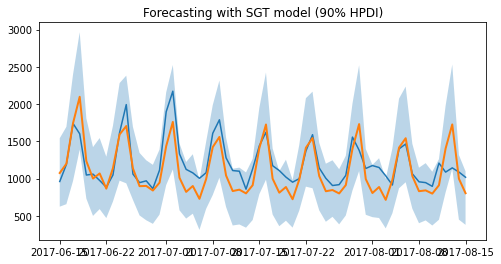

RMSLE 0.18303428141356515


In [ ]:
SEAS = 14
y_train = jnp.array(X_train.values[:, 0], dtype=jnp.float64)
kernel = NUTS(sgt)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4)
mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
samples = mcmc.get_samples()
predictive = Predictive(sgt, samples, return_sites=["y_forecast"])
forecast_marginal = predictive(random.PRNGKey(0), y_train, seasonality=SEAS, future=62)["y_forecast"]
forecast_marginal = forecast_marginal.at[jnp.isnan(forecast_marginal)].set(1.5*jnp.median(X_train.values))
y_pred = jnp.mean(forecast_marginal, axis=0)
plt.figure(figsize=(8, 4))
plt.plot(X_val.index, X_val.sales)
hpd_low, hpd_high = hpdi(forecast_marginal)
plt.plot(X_val.index, y_pred, lw=2)
plt.fill_between(X_val.index, hpd_low, hpd_high, alpha=0.3)
plt.title("Forecasting with SGT model (90% HPDI)")
plt.show()
print("RMSLE", rmsle(X_val, y_pred, squared=False))

In [ ]:
train_temp = train_wo_duplicates[(train_wo_duplicates.store_nbr == 1) & (train_wo_duplicates.family == 'AUTOMOTIVE')]
X = train_temp[['sales', 'date']].set_index('date')
X_train, X_val = X.iloc[:-62], X.iloc[-62:]
print("Lag values with highest autocorrelation values:\n")
print(jnp.argsort(autocorrelation(X_train.values[:, 0]))[-10:])

Lag values with highest autocorrelation values:

[ 230    7 1616   49   70   35   21   63   14    0]


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

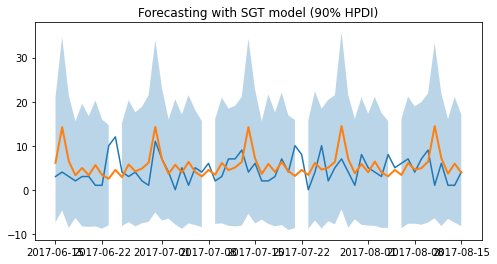

RMSLE 0.7069149226496885


In [ ]:
SEAS = 14 #max seasonality -> 2 years
y_train = jnp.array(X_train.values[:, 0], dtype=jnp.float64)
kernel = NUTS(sgt)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4)
mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
samples = mcmc.get_samples()
predictive = Predictive(sgt, samples, return_sites=["y_forecast"])
forecast_marginal = predictive(random.PRNGKey(0), y_train, seasonality=SEAS, future=62)["y_forecast"]
forecast_marginal = forecast_marginal.at[jnp.isnan(forecast_marginal)].set(1.5*jnp.median(X_train.values))
y_pred = jnp.mean(forecast_marginal, axis=0)
plt.figure(figsize=(8, 4))
plt.plot(X_val.index, X_val.sales)
hpd_low, hpd_high = hpdi(forecast_marginal)
y_pred = y_pred.at[y_pred < 0].set(0)
y_pred = y_pred.at[y_pred > 10e10].set(1.5*jnp.median(X_train.values))
plt.plot(X_val.index, y_pred, lw=2)
plt.fill_between(X_val.index, hpd_low, hpd_high, alpha=0.3)
plt.title("Forecasting with SGT model (90% HPDI)")
plt.show()
print("RMSLE", rmsle(X_val, y_pred, squared=False))

##Training

In [ ]:
train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])

stores = train_dates_wo_duplicates.store_nbr.unique()
families = train_dates_wo_duplicates.family.unique()

test_dates = test.copy()
dates = pd.DatetimeIndex(test['date'])

#LOAD FORECAST
forecast = test_dates.copy()
# forecast['sales'] = 0
fsaved = pd.read_csv('BES_wo_dup.csv')
forecast['sales'] = fsaved.sales.values


kernel = NUTS(sgt)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4, progress_bar=False)
mcmc._compile(random.PRNGKey(2023), jnp.array(np.zeros((1684,)), dtype=jnp.float64), seasonality=2)


   
    #
    #mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
for store in tq.tqdm(stores[33:]):

  logger = logging.getLogger('cmdstanpy')
  logger.addHandler(logging.NullHandler())
  logger.propagate = False
  logger.setLevel(logging.CRITICAL)
  pd.options.mode.chained_assignment = None

  F_models = {}

  for family in tq.tqdm(families):
    X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == store) & (train_dates_wo_duplicates.family == family)]
    X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
    #replace outliers
    # data = X[['ds', 'y']]
    # _, outliers = fit_predict_model(data, interval_width = 0.90, changepoint_range=0.80)
    # outliers = detect_anomalies(outliers)

    # if sum(outliers.anomaly) !=0:
      
    #   X.loc[X['y'] < 0, 'y'] = 0
    #   X.loc[(outliers.anomaly != 0).values, 'y'] = 1.5*jnp.median(X.y.values)


    lags = jnp.argsort(autocorrelation(X.y.values)) #most promising values of seasonality
    SEAS = lags[jnp.where((lags > 6) & (lags <= 363))[0][-2]] #second most promising value between week and 1 year
    y_train = jnp.array(X.y.values, dtype=jnp.float64)

    
    #kernel = NUTS(sgt)
    #from numpyro.infer import MCMC #avoid memory leak 
    #mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4, progress_bar=False)
    mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
    samples = mcmc.get_samples()
    predictive = Predictive(sgt, samples, return_sites=["y_forecast"])
    forecast_marginal = predictive(random.PRNGKey(0), y_train, seasonality=SEAS, future=16)["y_forecast"]                              
    forecast_marginal = forecast_marginal.at[jnp.isnan(forecast_marginal)].set(1.5*jnp.median(X.y.values))
      
    y_pred = jnp.mean(forecast_marginal, axis=0)

    #y_pred = predictions(y_train, SEAS)
    y_pred = y_pred.at[y_pred < 0].set(0)
    y_pred = y_pred.at[y_pred > 10e10].set(1.5*jnp.median(X.y.values))
    y_pred = y_pred.at[jnp.isnan(y_pred)].set(1.5*jnp.median(X.y.values))

    
    forecast.loc[(forecast.store_nbr == store) & (forecast.family == family), 'sales'] = y_pred
    forecast.sales.to_csv('BES_wo_dup.csv') #
    del samples, predictive, forecast_marginal, y_pred #avoid memory leak 
    gc.collect()

#forecast[forecast['sales'] < 0] = 0
#9


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [42]:
len(y_train)

1684

In [ ]:
# train_dates_wo_duplicates = train.groupby(["date", "store_nbr", "family"]).max().reset_index() 
# dates = pd.DatetimeIndex(train_dates_wo_duplicates['date'])

# stores = train_dates_wo_duplicates.store_nbr.unique()
# families = train_dates_wo_duplicates.family.unique()

In [ ]:
# X = train_dates_wo_duplicates[(train_dates_wo_duplicates.store_nbr == 1) & (train_dates_wo_duplicates.family == families[0])]
# X.sales.iloc[0:364].plot()
# X.rename(columns={'date': "ds", 'sales': "y"}, inplace=True)
# # data = X[['ds', 'y']]
# # _, outliers = fit_predict_model(data, interval_width = 0.90, changepoint_range=0.80)
# # outliers = detect_anomalies(outliers)

# # if sum(outliers.anomaly) !=0:
      
# #       X.loc[X['y'] < 0, 'y'] = 0
# #       X.loc[(outliers.anomaly != 0).values, 'y'] = 1.5*jnp.median(X.y.values)

In [ ]:
# lags = jnp.argsort(autocorrelation(X.y.values)) #most promising values of seasonality
# SEAS = lags[jnp.where((lags > 6) & (lags < 363))[0][-2]] #second most promising value between week and 2 years 
# SEAS

DeviceArray(21, dtype=int64)

In [ ]:
# SEAS = 21
# y_train = jnp.array(X.y.values, dtype=jnp.float64)
# kernel = NUTS(sgt)
# mcmc = MCMC(kernel, num_warmup=1000, num_samples=3000, num_chains=4)
# mcmc.run(random.PRNGKey(2023), y_train, seasonality=SEAS)
# samples = mcmc.get_samples()